## Imports

In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shapefile as shp
from sklearn.linear_model import LinearRegression
from collections import Counter
plt.style.use('fivethirtyeight')
#%matplotlib inline

In [21]:
def posant_accents(it):
    
    if type(it) == str:
        
        ##lletra ç
        
        if '\x87' in it:
            nova = it.replace('\x87','ç')
        else:
            nova = it

        ###lletra i
        if '¡' or 'Ã¯'or 'ï'or 'Ã\xad'or 'í' in nova:
            renova = nova.replace('¡', 'i').replace('Ã¯', 'i').replace('ï', 'i').\
            replace('Ã\xad', 'i').replace('í', 'i')
        else:
            renova = nova
        ###Lletra o
        if '\x95' or 'Ã³' or '¢' or 'ã³'or 'Ã²' or 'ò' in renova:
            trinova = renova.replace('\x95', 'o').replace('Ã³', 'o')\
            .replace('¢', 'o').replace('ã³', 'o').replace('Ã²', 'o').replace('ò', 'o')
        else:
            trinova = renova

        if '¢' in trinova:

            quatrinova = trinova.replace('¢', 'o')
        else:
            quatrinova = trinova

        ###lletra e
        if '\x82' or 'Ã©' or 'é' or 'è'or 'Ãš' or '\x8a' in quatrinova:
            cinquinova = quatrinova.replace('\x82', 'e').replace('Ã©', 'e').replace('é', 'e').replace('è', 'e').\
            replace('Ãš', 'e').replace('\x8a', 'e')
        else:
            cinquinova = quatrinova

        if '\x85' or 'Ã\xa0'in cinquinova:
            sixinova = cinquinova.replace('\x85', 'a').replace('Ã\xa0', 'a').replace('à', 'a')
        else:
            sixinova = cinquinova

        if 'Sarr' in sixinova:

            septinova = 'Sarria'
        else:
            septinova = sixinova

        if 'Ã§' in septinova:
            vuitinova = septinova.replace('Ã§', 'ç')
        else:
            vuitinova = septinova

        ##Lletra u
        if 'ãº' or 'ú' or '£'in vuitinova:
            nounova = vuitinova.replace('ãº', 'u').replace('ú', 'u').replace('£','u')
        else:
            nounova = vuitinova

        if 'ã³' or 'ó' in nounova:

            deunova = nounova.replace('ã³', 'o').replace('ó', 'o')
        else:
            deunova = nounova
    else:
        deunova = it
    
    return deunova

def remove_accents(word):
    
    return word.replace('à', 'a').replace('è','e').replace('é', 'e').replace('ï', 'i').replace('í', 'i').replace('ò','o').replace('ó', 'o').replace('ü','u').replace('ú', 'u')

# Tweaking Data

## DataFrames. Accidents

In [2]:
accidents = pd.read_csv('/Users/fcbnyc/mystuff/repos/BarcelonaAccidents/total_accidents_2018.csv',)
accidents.drop('Unnamed: 0', axis=1,inplace=True)
accidents.isnull().sum().sum()

0

In [3]:
date_columns = ['month_name', 'day_month', 'year']
date = accidents[date_columns]
dates = []
for i in date.itertuples():
    dates.append(i[1]+'/' +str(int(i[2]))+'/'+str(int(i[3])))
accidents['dates'] = dates
dates = accidents.groupby('dates').agg({'incident_#':'count', '#_deaths': 'sum'})

number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_days = len(dates)
accidents['year'] = [int(x) for x in accidents['year']]
dataframe = pd.DataFrame(columns=['Question_1', 'Answer_1', "Question_2", "Answer_2"])
for i in range(0,20):
    if i <11:
        
        dataframe.at[1, 'Question_1'] = "Total deaths: "
        dataframe.at[1, 'Answer_1'] = str(number_total_deaths)
        dataframe.at[2,'Question_1'] = "Total accidents: "
        dataframe.at[2,'Answer_1'] = str(number_total_accidents)
        dataframe.at[3, 'Question_1'] = "Total days: "
        dataframe.at[3, 'Answer_1'] = str(number_total_days)
        dataframe.at[4, 'Question_1'] = 'Accidents per day:'
        dataframe.at[4, 'Answer_1']= round(number_total_accidents/number_total_days,2)
        dataframe.at[5, 'Question_1'] = 'Deaths per day:'
        dataframe.at[5, 'Answer_1'] =round(number_total_deaths/number_total_days,2)
        dataframe.at[6, 'Question_1'] = "Year with the highest number of accidents:"
        dataframe.at[6,'Answer_1'] = int(accidents.groupby('year')['incident_#'].count().sort_values(ascending=False).index[0])
        dataframe.at[7, 'Question_1']='Accidents: '
        dataframe.at[7,'Answer_1'] =accidents.groupby('year')['incident_#'].count().sort_values(ascending=False).values[0]
        dataframe.at[8,'Question_1'] = "Year with the highest number of deaths:"
        dataframe.at[8, 'Answer_1'] =int(accidents.groupby('year')['#_deaths'].sum().sort_values(ascending=False).index[0])
        dataframe.at[9,'Question_1'] = 'Deaths'
        dataframe.at[9,'Answer_1'] = int(accidents.groupby('year')['#_deaths'].sum().sort_values(ascending=False).values[0])
    else:
        dataframe.at[1, 'Question_2'] = "Month with the highest number of accidents:"
        dataframe.at[1, 'Answer_2'] = accidents.groupby(['year', 'month_name'])['incident_#'].count().sort_values(ascending=False).index[0]
        dataframe.at[2, 'Question_2'] = 'Accidents:'
        dataframe.at[2,'Answer_2'] =int(accidents.groupby(['year', 'month_name'])['incident_#'].count().sort_values(ascending=False).values[0])
        dataframe.at[3,'Question_2'] = "Month with the highest number of deaths:"
        dataframe.at[3,'Answer_2'] = accidents.groupby(['year', 'month_name'])['#_deaths'].sum().sort_values(ascending=False).index[0]
        dataframe.at[4,'Question_2'] = "Deaths: "
        dataframe.at[4,'Answer_2'] = int(accidents.groupby(['year', 'month_name'])['#_deaths'].sum().sort_values(ascending=False).values[0])
        dataframe.at[5, 'Question_2'] = "Day with the highest number of accidents:"
        dataframe.at[5,'Answer_2'] =accidents.groupby('dates')['incident_#'].count().sort_values(ascending=False).index[0]
        dataframe.at[6,'Question_2'] ="Accidents: "
        dataframe.at[6,'Answer_2'] = accidents.groupby('dates')['incident_#'].count().sort_values(ascending=False).values[0]
        dataframe.at[7, 'Question_2'] ="Day with the highest number of deaths:"
        dataframe.at[7, 'Answer_2'] = accidents.groupby('dates')['#_deaths'].sum().sort_values(ascending=False).index[0]
        dataframe.at[8, 'Question_2'] = "Deaths:"
        dataframe.at[8, 'Answer_2'] =int(accidents.groupby('dates')['#_deaths'].sum().sort_values(ascending=False).values[0])
        
dataframe.fillna('',inplace=True)
dataframe




,Question_1,Answer_1,Question_2,Answer_2
1,Total deaths:,241,Month with the highest number of accidents:,"(2017, November)"
2,Total accidents:,86686,Accidents:,991
3,Total days:,3287,Month with the highest number of deaths:,"(2011, August)"
4,Accidents per day:,26.37,Deaths:,8
5,Deaths per day:,0.07,Day with the highest number of accidents:,May/15/2015
6,Year with the highest number of accidents:,2017,Accidents:,55
7,Accidents:,10335,Day with the highest number of deaths:,August/30/2014
8,Year with the highest number of deaths:,2010,Deaths:,3
9,Deaths,39,,


## Plotting---TIME BASED FEATURES


1. Deaths/Accidents per YEAR.
2. Deaths/Accidents per MONTH.
3. Deaths/Accidents per WEEKDAY,
4. Daths/Accidents per WEEKEND. 
5. Deaths/Accidents per HOUR.
6. Deaths/Accidents per SHIFT


## 1. Deaths/Accidents per YEAR.

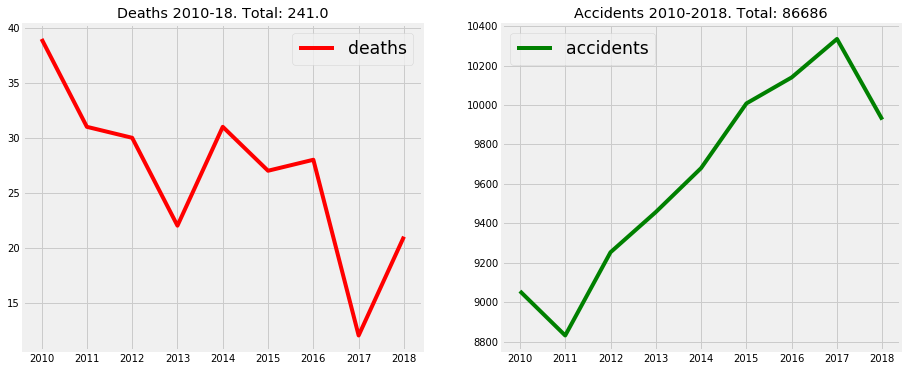

In [4]:
deads_per_year = accidents.groupby('year').sum()['#_deaths']
accidents_per_year = accidents.groupby('year').count()['incident_#']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.plot(deads_per_year, color='r', label ='Deaths_per_year')
ax2.plot(accidents_per_year, color='g', label='Accidents_per_year.')

ax1.set_title('Deaths 2010-18. Total: {}'.format(round(accidents['#_deaths'].sum(), 0)))
ax2.set_title('Accidents 2010-2018. Total: {}'.format(len(accidents)))
#plt.legend([ax1, ax2],["Deads", "Accidents"])
ax1.legend(["deaths"], fontsize ='xx-large')
ax2.legend(["accidents"], fontsize ='xx-large')


plt.savefig('./charts/accidents_deaths_per_year_2018.png');

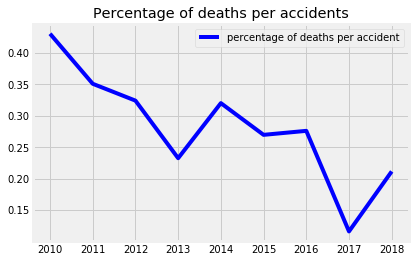

In [5]:
ratio = []
year = list(range(2010, 2019))
for x, z in zip(deads_per_year, accidents_per_year):
    ratio.append((x/z)*100)
#print(ratio)
plt.plot(year, ratio, color='blue', label='percentage of deaths per accident');
average_deads_per_accident = sum(ratio)/8
#plt.axhline(average_deads_per_accident, c='b', label='average of Deads per accident')
plt.legend()
plt.title('Percentage of deaths per accidents');
plt.savefig('./charts/avg_deaths_accident_per_year_2018.png');
### The ratio of deads per accident has been decrasing since 2010


## 2. Deaths/Accidents per month.

In [6]:
mes = accidents.groupby('month_name').agg({'#_deaths': 'sum','incident_#': 'count'})
mes = mes.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',\
'September', 'October', 'November','December'])
mes.columns = ['deaths_per_month', 'accidents_per_month']

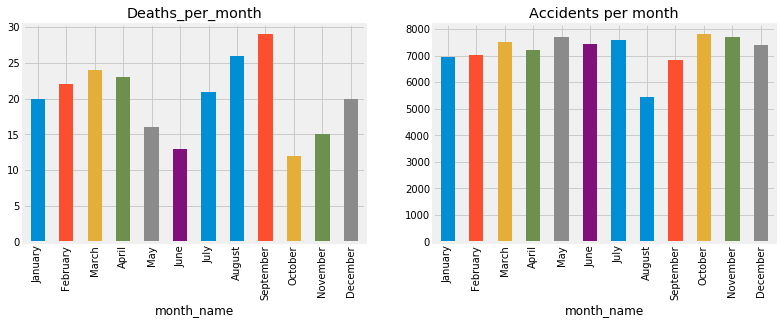

In [7]:
# mes['deaths_per_month'] =deaths_per_month
# mes['accidents_per_month'] = accidents_per_month
mes['average'] = mes['deaths_per_month']/mes['accidents_per_month']


fig, axes = plt.subplots(1,2, figsize=(12,4))
mes['deaths_per_month'].plot(kind='bar', ax=axes[0], title='Deaths_per_month');
mes['accidents_per_month'].plot(kind='bar', ax=axes[1], title='Accidents per month');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_month_2018.png');

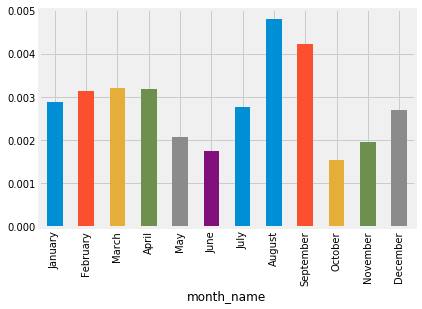

In [8]:
mes['average'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_month_2018.png');

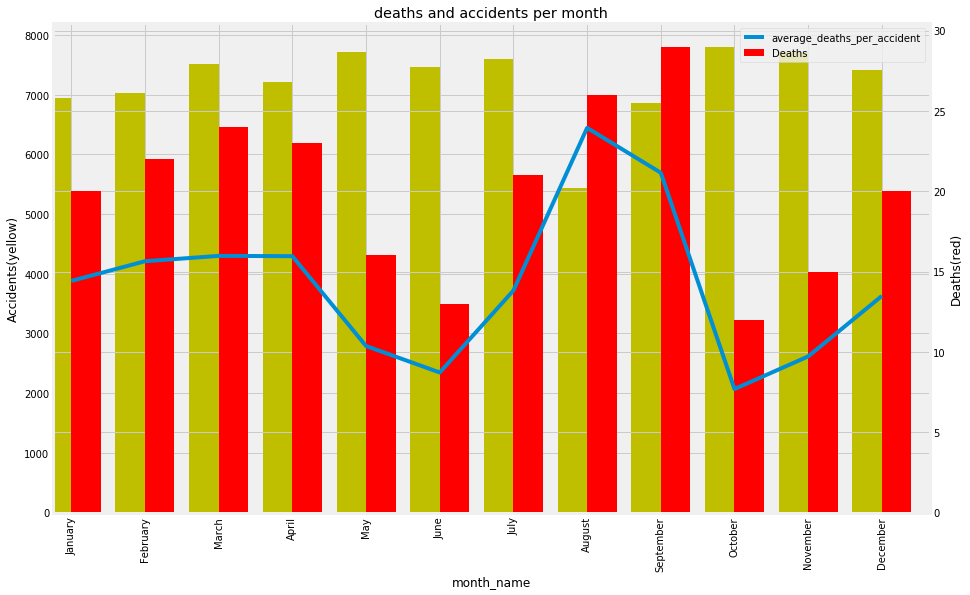

In [9]:
mes['average_deaths_per_accident'] = mes['average']*5000
#mes['average_target_per_accident'] = (mes['target']/mes['accidents_per_month'])*1000
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
#plt.bar(shift, accidents_per_shift, color ='r', ax=ax, width=width, position=1)
mes['accidents_per_month'].plot(kind='bar', color='y', ax=ax, width=width, position=1, label='Accidents')
mes['deaths_per_month'].plot(kind='bar', color='r', ax=ax2, width=width, position=0, label='Deaths')
#mes['average_target_per_accident'].plot(kind='line')
mes['average_deaths_per_accident'].plot(kind='line')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
plt.title('deaths and accidents per month')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_month2_2018.png');

###Summers are more dangerous

## 3. Deaths/Accidents per weekday.

In [10]:
setmana = accidents.groupby('weekday_name').agg({'#_deaths': 'sum', 'incident_#': 'count'})
setmana = setmana.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
setmana.columns = ['deaths_per_weekday', 'accidents_per_weekday']

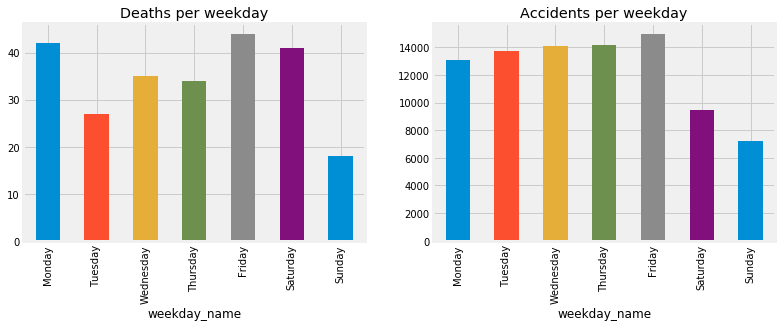

In [11]:
setmana['average'] = setmana['deaths_per_weekday']/ setmana['accidents_per_weekday']
#setmana['average_target'] = setmana['target']/ setmana['accidents_per_weekday']
fig, axes = plt.subplots(1,2, figsize=(12,4))
setmana['deaths_per_weekday'].plot(kind='bar', ax=axes[0], title='Deaths per weekday');
setmana['accidents_per_weekday'].plot(kind='bar', ax=axes[1], title='Accidents per weekday');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_weekday_2018.png');

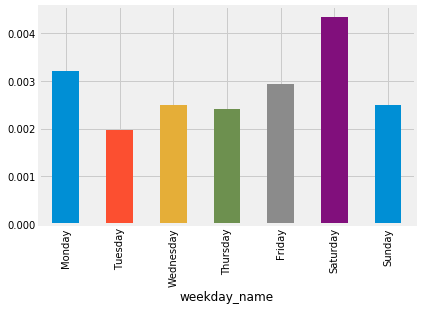

In [12]:

setmana['average'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_weekday_2018.png');

## 4. Deaths/Accidents per weekend.

In [13]:
weekend = accidents.loc[accidents['weekday_name'].isin(['Friday', 'Saturday', 'Sunday', 'Monday']),\
              ['incident_#', '#_deaths', 'weekday_name', 'hour_day']].groupby(['weekday_name', 'hour_day']).agg\
({'incident_#': 'count', '#_deaths': 'sum'})

weekend= weekend.reindex(['Friday', 'Saturday', 'Sunday', 'Monday'], level=0)
for hour in range(0,13):
    weekend.drop(index=('Friday', hour),inplace=True)
for hour in range(13,24):
    weekend.drop(index=('Monday', hour),inplace=True)
weekend.columns =['number_of_accidents', 'number_of_deaths']

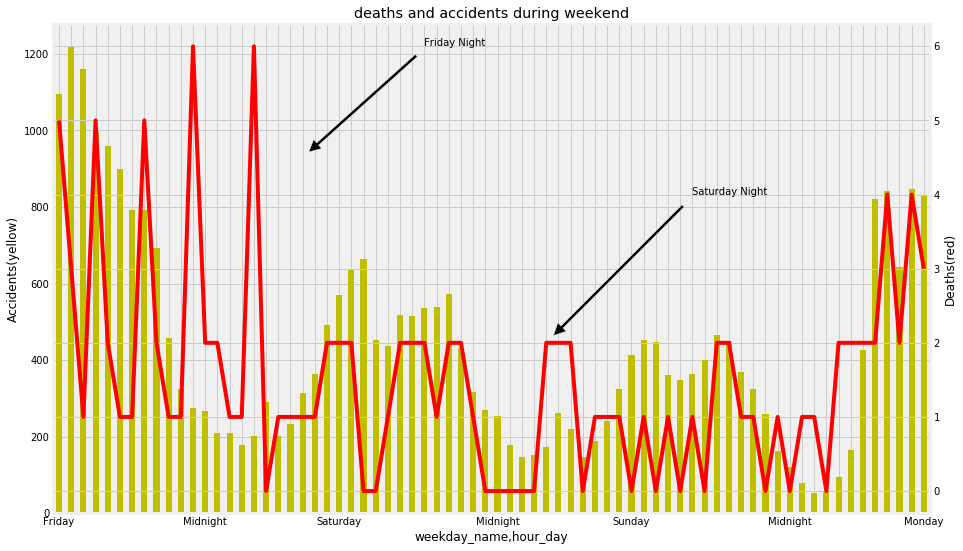

In [14]:
squad = ['' for x in range(0,72)]
for i in [12,36,60]:
    squad[i] = 'Midnight'
squad[0] = 'Friday'
squad[23] = 'Saturday'
squad[47] = 'Sunday'
squad[71] = 'Monday'
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
weekend.plot(kind='bar', y='number_of_accidents', color='y', ax=ax, legend=False )#.legend(loc='best')
weekend.plot(kind='line', y='number_of_deaths', color='r', ax=ax2, legend=False)#.legend(loc='best')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad, rotation= 360)
plt.annotate('Friday Night', xy=(20, 4.5), xytext=(30, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.annotate('Saturday Night', xy=(40, 2), xytext=(52, 4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.title('deaths and accidents during weekend')
#plt.legend(['Accidents', 'Deaths'],loc='best')
plt.savefig('./charts/accidents_deaths_per_weekendlong_2018.png'); 

## 5. Deaths/Accidents per hour of the day.


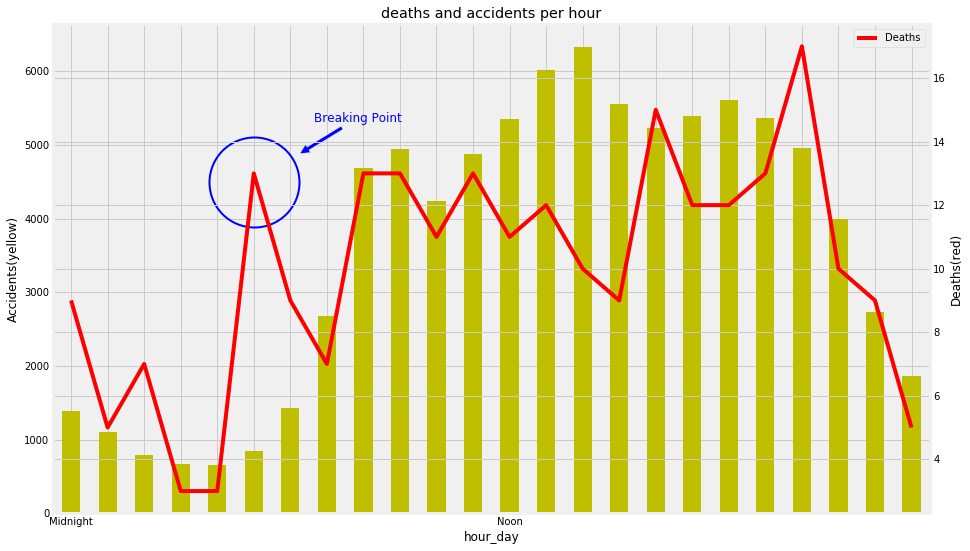

In [15]:
squad2 = []
for i in range(0,24):
    if i == 0:
        squad2.append('Midnight')
    elif i == 12:
        squad2.append('Noon')
    else:
        squad2.append('')

deaths_per_hour =  accidents.groupby('hour_day').sum()['#_deaths']
accidents_per_hour = accidents.groupby('hour_day').count()['incident_#']

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
accidents_per_hour.plot(kind='bar', color='y', ax=ax, label='Accidents')
deaths_per_hour.plot(kind='line', color='r', ax=ax2, label='Deaths')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad2, rotation= 360)
circle_rad = 45
point = (5, 4500)
ax.plot(point[0], point[1], 'o',
        ms=circle_rad * 2, mec='b', mfc='none', mew=2)
ax.annotate('Breaking Point', xy=point, xytext=(60, 60),
            textcoords='offset points',
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=circle_rad * 1.2)
)
plt.title('deaths and accidents per hour')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_hour_2018.png'); 

In [16]:
weekly_hour = accidents.groupby(['weekday_name', 'hour_day'])['incident_#'].count().unstack('hour_day')
weekly_hour= weekly_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_hour['maxim_accidents'] = weekly_hour.max(axis=1)
weekly_hour['hour_maxim_accidents'] = weekly_hour.idxmax(axis=1)
weekday_hour_acc_death = pd.DataFrame(data= weekly_hour[['maxim_accidents', 'hour_maxim_accidents']])
weekly_hour = accidents.groupby(['weekday_name', 'hour_day'])['#_deaths'].sum().unstack('hour_day')
weekly_hour= weekly_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_hour['maxim_deaths'] = weekly_hour.max(axis=1)
weekly_hour['hour_maxim_deaths'] = weekly_hour.idxmax(axis=1)
final_df = pd.concat([weekday_hour_acc_death, weekly_hour[['maxim_deaths', 'hour_maxim_deaths']]], axis=1)
final_df

hour_day,maxim_accidents,hour_maxim_accidents,maxim_deaths,hour_maxim_deaths
weekday_name,,,,
Monday,930,18.0,4.0,9.0
Tuesday,1034,14.0,3.0,9.0
Wednesday,1017,14.0,5.0,20.0
Thursday,1046,14.0,3.0,8.0
Friday,1217,14.0,5.0,13.0
Saturday,664,14.0,6.0,0.0
Sunday,467,19.0,2.0,5.0


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


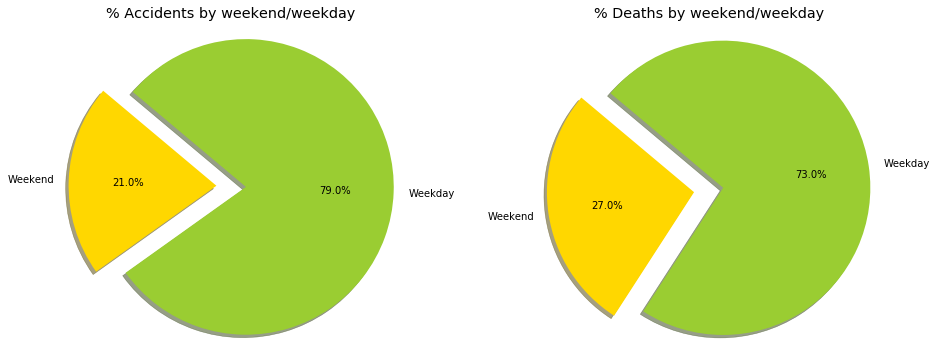

In [17]:
week_hour = accidents.groupby(['weekday_name', 'hour_day']).agg({'incident_#':'count', '#_deaths': 'sum'})
week_hour.columns = ['number_of_accidents', 'number_of_deaths']
week_hour = week_hour.reindex_axis(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],level=0)
# week_hour= week_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#accidents.loc[accidents['']]
cap_de_setmana = accidents[((accidents['shift'] == 'night') & (accidents['weekday_name'] == 'Friday')) | (accidents['weekday_name'] == 'Saturday') |\
             (accidents['weekday_name'] == 'Sunday')]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Weekend', 'Weekday']
weekend_acc = cap_de_setmana['incident_#'].count()
weekday_acc = number_total_accidents- weekend_acc

sizes_acc = [weekend_acc, weekday_acc]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by weekend/weekday")

weekend_dea = cap_de_setmana['#_deaths'].sum()
weekday_dea = number_total_deaths- weekend_dea

sizes = [weekend_dea, weekday_dea,]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by weekend/weekday")
plt.savefig('./charts/accidents_deaths_by_weekend_weekday_2018.png')
plt.show()



/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


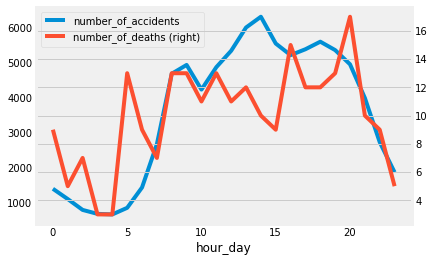

In [18]:
hourly_analysis = accidents.groupby('hour_day').agg({'incident_#': 'count', '#_deaths': 'sum'})
hourly_analysis.columns = ['number_of_accidents', 'number_of_deaths']
hourly_analysis['average_accidents'] = (hourly_analysis['number_of_accidents']/hourly_analysis['number_of_accidents'].sum())*100
hourly_analysis['average_deaths'] = (hourly_analysis['number_of_deaths']/hourly_analysis['number_of_deaths'].sum())*100
hourly_analysis.plot(y=['number_of_accidents', 'number_of_deaths'],secondary_y ='number_of_deaths');

## 6. Deaths/Accidents per shift

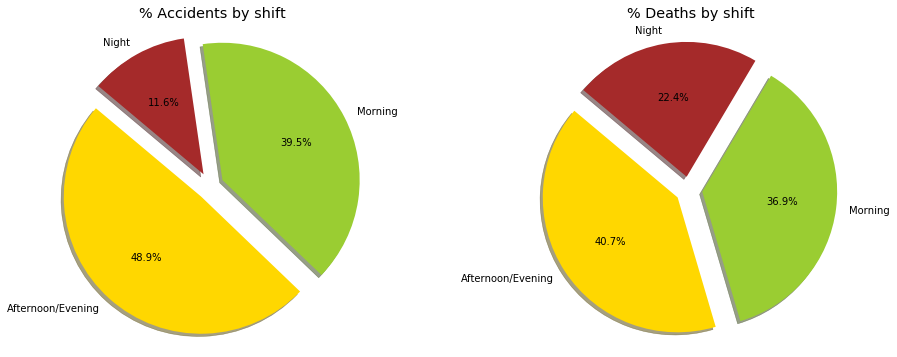

In [19]:
shift = accidents.groupby('shift').agg({'incident_#': 'count', '#_deaths': 'sum'})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Afternoon/Evening', 'Morning', 'Night']
aft_acc = shift.at['afternoon/evening','incident_#']
mor_acc = shift.at['morning','incident_#']
nig_acc = shift.at['night','incident_#']
sizes_acc = [aft_acc, mor_acc, nig_acc]
colors = ['gold', 'yellowgreen', 'brown']
explode = (0.1, 0.1,0.1)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by shift")

aft_dea = shift.at['afternoon/evening','#_deaths']
mor_dea = shift.at['morning','#_deaths']
nig_dea = shift.at['night','#_deaths']
sizes = [aft_dea, mor_dea, nig_dea]
explode = (0.1, 0.1,0.1)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by shift")
plt.savefig('./charts/accidents_deaths_by_shift_2018.png')
plt.show()

# Plotting---SPACIAL BASED FEATURES


1. Deaths/Accidents by DISTRICT.
2. Deaths/Accidents by NEIGHBORHOOD.
3. Deaths/Accidents per STREET/AVENUE.
4. Street and neighborhoods.

## 1. Deaths/Accidents by DISTRICT. 

In [22]:
district = accidents.groupby('district').agg({'incident_#': 'count', '#_deaths': 'sum'})
district.columns =['number_of_accidents', 'number_of_deaths']
district.index = [remove_accents(x) for x in district.index]
district.index = ['Sarria' if x.startswith('Sarr') else x for x in district.index]
district.drop('Desconegut', inplace=True)
district['deaths_per_accident'] = (district['number_of_deaths']/district['number_of_accidents']) * 100

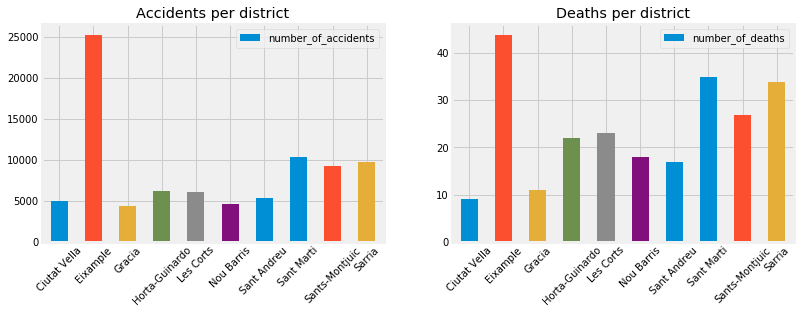

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
district.plot(kind='bar', ax=axes[0], y ='number_of_accidents', title='Accidents per district',rot=45);
district.plot(kind='bar', ax=axes[1], y= 'number_of_deaths' , title='Deaths per district', rot=45);
plt.savefig('./charts/deaths_accidents_per_district_2018.png')

In [24]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    #name = df[df['cartodb_id'] == id]['n_distri'].values[0]
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #name = df[df['cartodb_id'] == id+1]['n_distri'].values[0]
            #name = df.at[id,'n_distri']
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = [list(x) for x in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_map_fill_multiples_ids(title, city, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
  
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    df['n_distri'] = [posant_accents(x) for x in df['n_distri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_distri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            name = df.at[id,'n_distri']
            plt.text(x0, y0, name, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
        
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
#             for i in range(6):
#                 print ("\n"+str(i+1)+': '+str(int(bins[i]))+
#                        " => "+str(int(bins[i+1])-1))
#             print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
def plot_barri_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_barri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone_barri(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (9,7));
    
def plot_map_fill_multiples_ids_tone_barri(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (9,7)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            name = df.at[id,'n_barri']
            plt.text(x0, y0,id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def plot_shape_barri(sf, id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    df = read_shapefile(sf)
    name = df.at[id,'n_barri']
    print(id,name)
    return x0, y0

def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    df = read_shapefile(sf)
    name = df.at[id,'n_barri']
    print(id,name)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_barri_data_deaths(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color_barri(data, color)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_barri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone_barri(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def calc_color_barri(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data.rank(method='first'), 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
#             for i in range(6):
#                 print ("\n"+str(i+1)+': '+str(int(bins[i]))+
#                        " => "+str(int(bins[i+1])-1))
#             print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

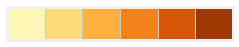

<Figure size 504x504 with 0 Axes>

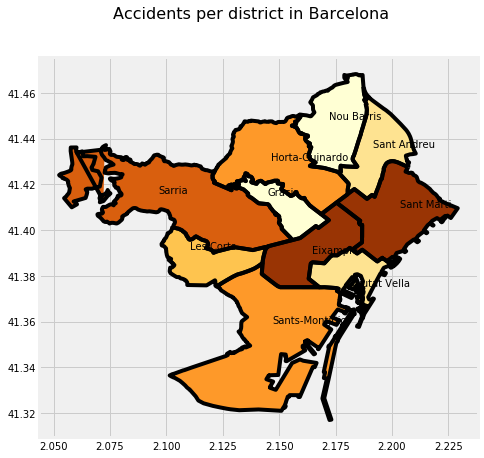

In [25]:
import shapefile as shp
shp_path = "./shapefiles_barcelona_distrito/shapefiles_barcelona_distrito.shp"
sf = shp.Reader(shp_path)
df = read_shapefile(sf)
df['n_distri'] = [posant_accents(x) for x in df['n_distri']]

title = 'Accidents per district in Barcelona'
data = district.number_of_accidents
names = district.index
plot_cities_data(sf, title, names, data, 5, True)
plt.savefig('./charts/shapefile_district_acc.png')

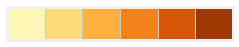

<Figure size 504x504 with 0 Axes>

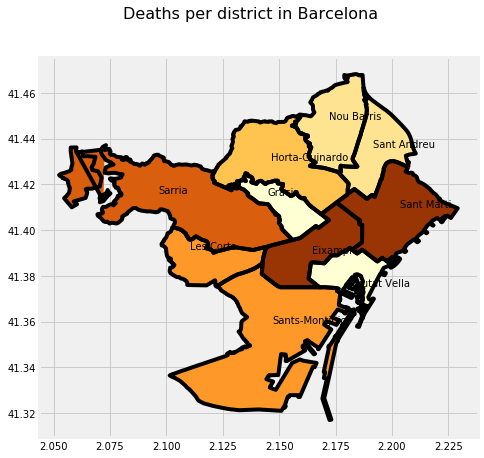

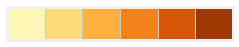

<Figure size 504x504 with 0 Axes>

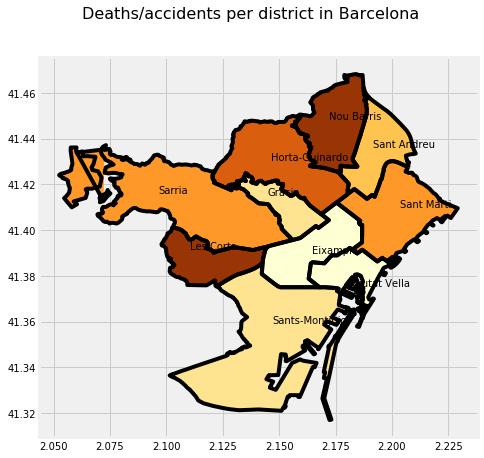

In [26]:
title = 'Deaths per district in Barcelona'
data = district.number_of_deaths
names = district.index
title_1 = 'Deaths/accidents per district in Barcelona'
data_1 = district.deaths_per_accident
plot_cities_data(sf, title, names, data, 6, True)
plt.savefig('./charts/shapefile_district_dea.png')
plot_cities_data(sf, title_1, names, data_1, 6, True)
plt.savefig('./charts/shapefile_district_ratio.png')

## 2. Deaths/Accidents by NEIGHBORHOOD. 


In [27]:
neighborhood = accidents.groupby('neighborhood').agg({'incident_#': 'count', '#_deaths': 'sum'})
neighborhood.columns = ['number_of_accidents', 'number_of_deaths']
neighborhood['deaths_per_accident'] = (neighborhood['number_of_deaths']/neighborhood['number_of_accidents']) * 100
neighborhood.drop('Desconegut', inplace=True)
neighborhood.index = [remove_accents(posant_accents(x)) for x in neighborhood.index]
#neighborhood.sort_values('number_of_deaths', ascending=False).head(10)

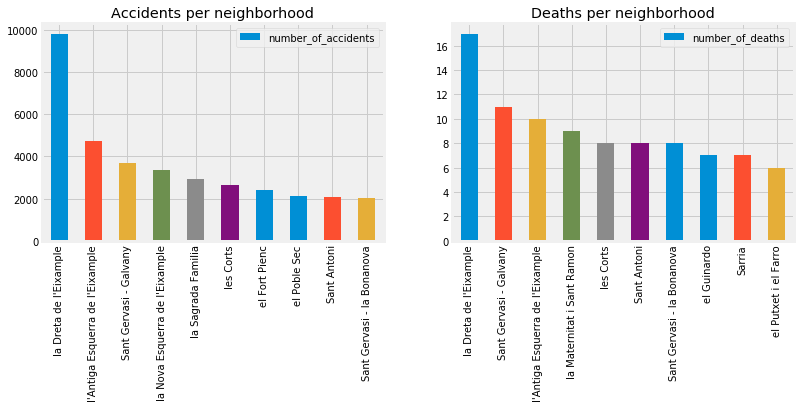

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
neighborhood.sort_values('number_of_accidents', ascending=False).head(10).plot(kind='bar', ax=axes[0], y ='number_of_accidents', title='Accidents per neighborhood');
neighborhood.sort_values('number_of_deaths', ascending=False).head(10).plot(kind='bar', ax=axes[1], y= 'number_of_deaths' , title='Deaths per neighborhood');
plt.savefig('./charts/deaths_accidents_per_neighborhood_2018.png')

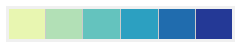

<Figure size 648x504 with 0 Axes>

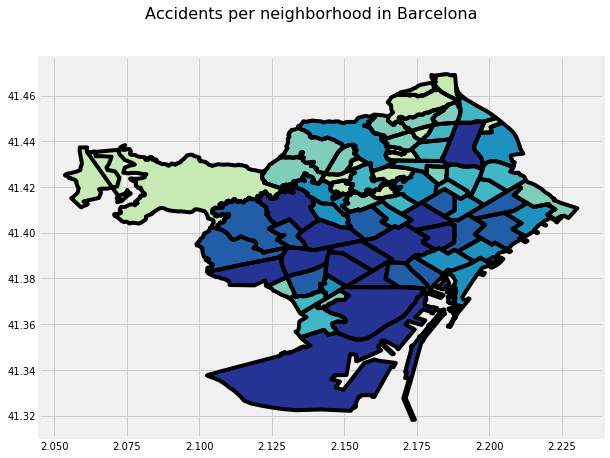

In [30]:
shp_path = "./shapefiles_barrio_barcelona/shapefiles_barrio_barcelona.shp"
sf = shp.Reader(shp_path)
df = read_shapefile(sf)
df['n_distri'] = [posant_accents(x) for x in df['n_distri']]
df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
df
title = 'Accidents per neighborhood in Barcelona'
data = neighborhood.number_of_accidents
names = neighborhood.index
plot_barri_data(sf, title, names, data, 2, False);
#plt.scatter(x,y)
#plt.plot([2.10,2.220],[41.382,41.413], 'b',linewidth=5)
plt.savefig('./charts/shapefile_neighborhood_acc.png');

70 Sant Andreu


<Figure size 792x648 with 0 Axes>

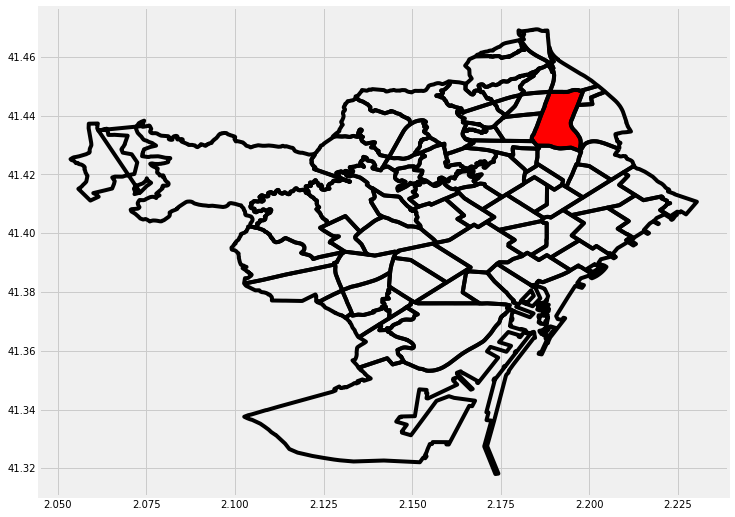

In [31]:

plot_map_fill(70,sf, x_lim=None,y_lim=None)
plt.savefig('./charts/shapefile_neighborhood_sant_andreu.png');

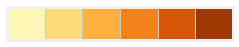

<Figure size 792x648 with 0 Axes>

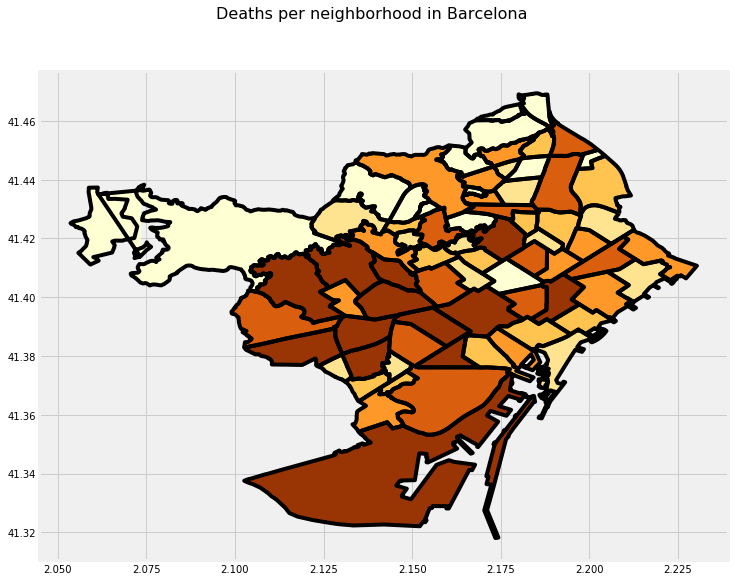

In [32]:
title = 'Deaths per neighborhood in Barcelona'
data = neighborhood.number_of_deaths
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 6, False);

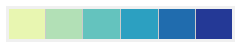

<Figure size 648x504 with 0 Axes>

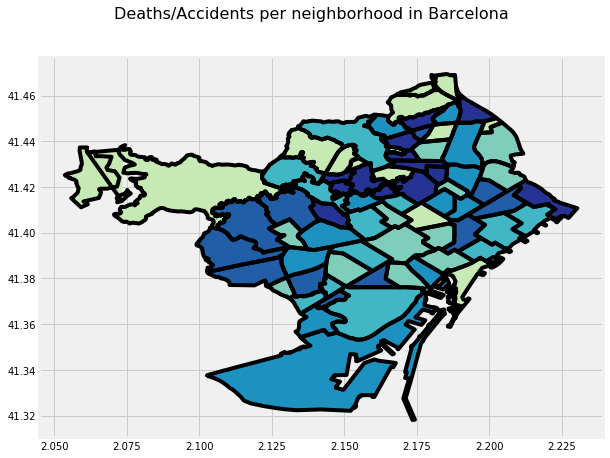

In [33]:
title = 'Deaths/Accidents per neighborhood in Barcelona'
data = neighborhood.deaths_per_accident
names = neighborhood.index
plot_barri_data(sf, title, names, data, 2, False);

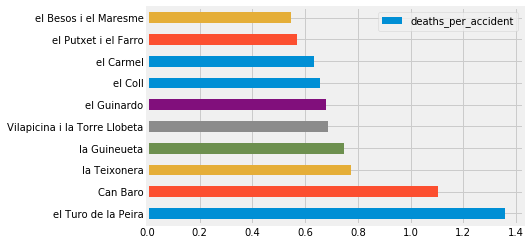

In [198]:
neighborhood.sort_values('deaths_per_accident', ascending=False).head(10).plot(kind='barh', y= 'deaths_per_accident');

In [213]:
#How many of ghe neighborhoods with more accidents have also a high rate death/accidents?
most_accidents = set(neighborhood.sort_values('number_of_accidents', ascending=False).head(10).index)
most_ratio = set(neighborhood.sort_values('deaths_per_accident', ascending=False).head(10).index)
most_deaths = set(neighborhood.sort_values('number_of_deaths', ascending=False).head(10).index)
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")
common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
{'el Putxet i el Farro', 'el Guinardo'}


In [ ]:
##Very interesting: None of the neighborhoods with more accidents are the ones with highest ratio.
##Only 2 of the neighborhoods with high number of deaths (the 8th and the 10th)

## 3. Deaths/Accidents by STREET. 

In [35]:
accidents['street'] = [remove_accents(posant_accents(x.strip().lower())) for x in accidents['street']]
street = accidents.groupby('street').agg({'incident_#': 'count', '#_deaths': 'sum'}).sort_values('incident_#', ascending=False)
street.columns = ['number_of_accidents', 'number_of_deaths']
street['deaths_per_accident'] = (street['number_of_deaths']/street['number_of_accidents'])*100
#[x for x in street.index if x.startswith('Corts')]
street['number_of_accidents'].sum(), street['number_of_accidents'][0:100].sum()



(86686, 46445)

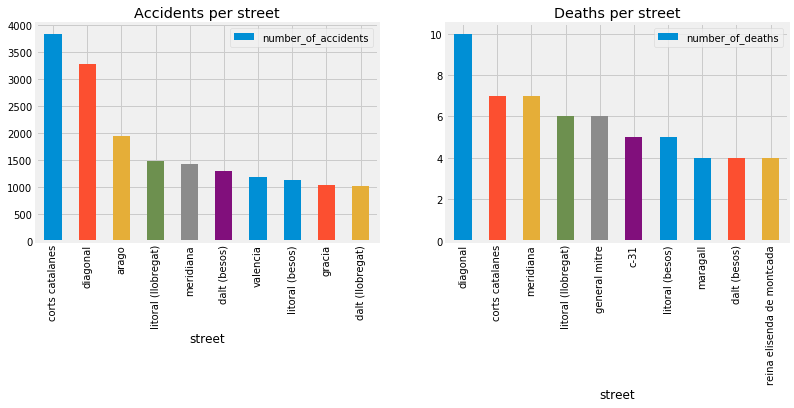

In [36]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
street.head(10).plot(kind='bar', ax=axes[0], y ='number_of_accidents', title='Accidents per street');
street.sort_values('number_of_deaths', ascending=False).head(10).plot(kind='bar', ax=axes[1], y= 'number_of_deaths' , title='Deaths per street');
plt.savefig('./charts/deaths_accidents_per_street_2018.png')
#street.head(15).plot(kind='bar', y='number_of_accidents')

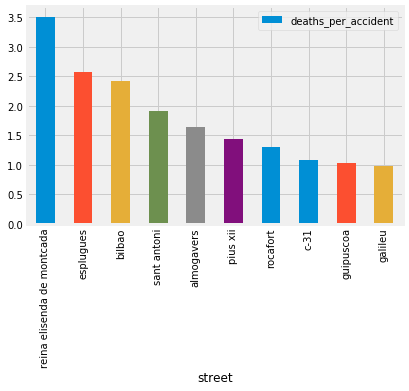

In [40]:
street[street['number_of_accidents'] >100].sort_values('deaths_per_accident',ascending=False).head(10).\
plot(kind='bar', y='deaths_per_accident')

In [41]:
#How many of ghe streets with more accidents have also a high rate death/accidents?
most_accidents = set(street.sort_values('number_of_accidents', ascending=False).head(10).index)
most_ratio = set(street[street['number_of_accidents'] >100].sort_values('deaths_per_accident', ascending=False).head(10).index)
most_deaths = set(street.sort_values('number_of_deaths', ascending=False).head(10).index)
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")
common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
{'reina elisenda de montcada', 'c-31'}


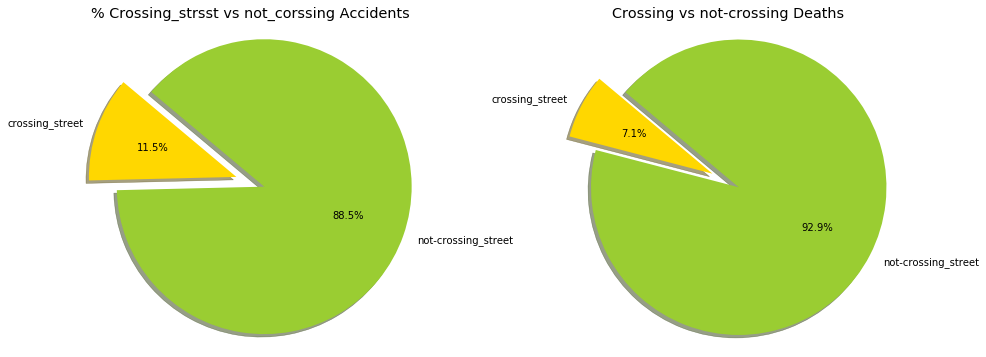

In [43]:
##Are the cross orads riskier than the roads?
accidents['street_crossing'] = [1 if '/' in x else 0 for x in accidents['street']]
street_crossing = accidents[accidents['street_crossing'] == 1]
no_street_crossing = accidents[accidents['street_crossing'] == 0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['crossing_street', 'not-crossing_street']

sizes_acc = [len(street_crossing), len(no_street_crossing)]
colors = ['gold', 'yellowgreen',]
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Crossing_strsst vs not_corssing Accidents")

sizes = [street_crossing['#_deaths'].sum(), no_street_crossing['#_deaths'].sum()]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("Crossing vs not-crossing Deaths")
plt.savefig('./charts/accidents_deaths_by_crossing_2018.png')
plt.show()

In [188]:
##let's include cross roadas to ghe analysis

size = max([len(x.split('/')) for x in accidents['street']])
columnes = ['incident_#', '#_deaths',]
columnes.extend(['street_{}'.format(x) for x in range(1, size+1)])
df = accidents[['incident_#', 'street', '#_deaths']].copy()
my_dict = {}
for colum in columnes:
    my_dict[colum] = []

for row in df.itertuples():
    #print(row)
    if '/' not in str(row[2]):
        
        my_dict['incident_#'].append(row[1])
        my_dict['street_1'].append(row[2])
        my_dict['street_2'].append('')
        my_dict['#_deaths'].append(row[3])
        deaths.append(row[2])
    else:
        split = row[2].split('/')
        my_dict['incident_#'].append(row[1])
        my_dict['street_1'].append(split[0].strip())
        my_dict['street_2'].append(split[1].strip())
        my_dict['#_deaths'].append(row[3])
df = pd.DataFrame()
for key in my_dict.keys():
    df[key] = my_dict[key]

dataframe = pd.DataFrame()
total_street = my_dict['street_1']+my_dict['street_2']
total_street = [x for x in total_street if x != '']

for element in set(total_street):
    dataframe.at[element, 'accidents'] = total_street.count(element)
    dataframe.at[element, 'deaths'] = df[(df['street_1'] == element)|(df['street_2'] == element)]['#_deaths'].sum()
dataframe.head()

,accidents,deaths
taquigraf serra,15.0,0.0
tamariu,4.0,0.0
modolell,68.0,0.0
pisuerga,18.0,0.0
borriana,11.0,0.0


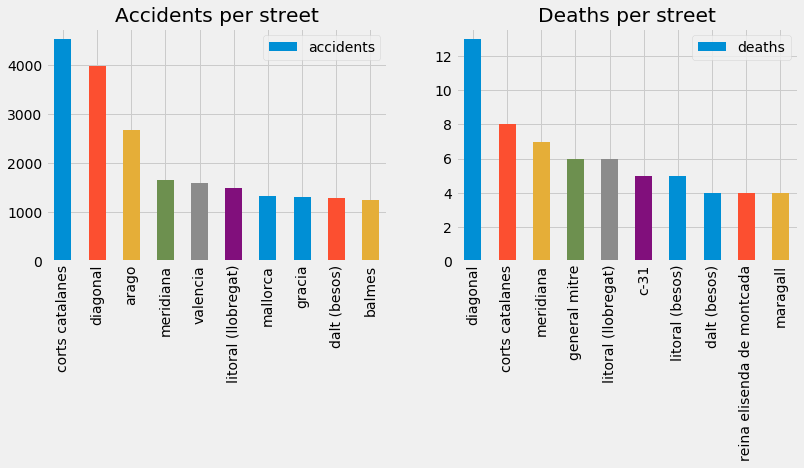

In [194]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
dataframe.sort_values('accidents', ascending=False).head(10).plot(kind='bar', ax=axes[0], y ='accidents', title='Accidents per street');
dataframe.sort_values('deaths', ascending=False).head(10).plot(kind='bar', ax=axes[1], y= 'deaths' , title='Deaths per street');
plt.savefig('./charts/deaths_accidents_per_street_2018_w_crossing.png')
#street.head(15).plot(kind='bar', y='number_of_accidents')

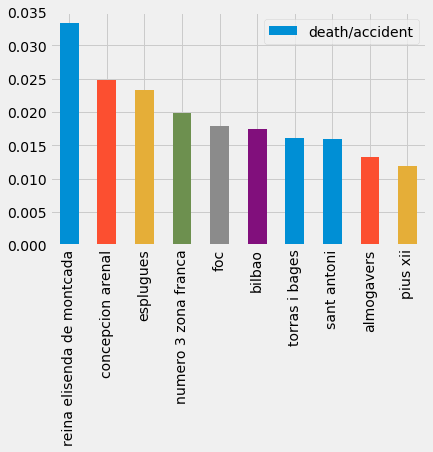

In [196]:
dataframe['death/accident'] = dataframe['deaths']/dataframe['accidents']
dataframe[dataframe['accidents'] > 100].sort_values('death/accident', ascending=False).head(10).\
plot(kind='bar',y = 'death/accident')

In [198]:
#How many of the streets with more accidents have also a high rate death/accidents?
most_accidents = set(dataframe.sort_values('accidents', ascending=False).head(10).index)
most_ratio = set(dataframe.sort_values('death/accident', ascending=False).head(10).index)
most_deaths = set(dataframe.sort_values('deaths', ascending=False).head(10).index)
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")
common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
No common elements


## 4. STREET & neighborhood. 
# drawing streets on the map

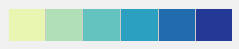

<Figure size 792x648 with 0 Axes>

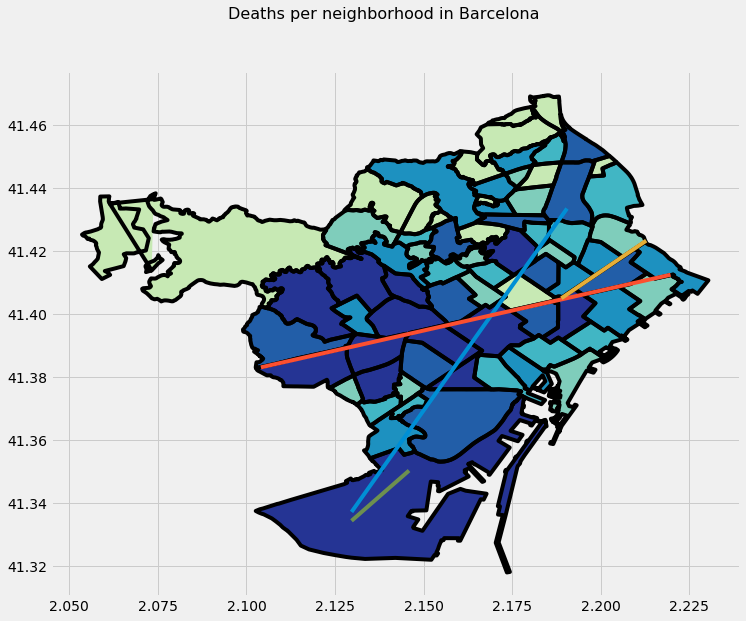

In [299]:
#street_name = 'meridiana'
    
def plotting_line(street_name):    
    street_name = street_name.lower()    
    df = accidents[['street', 'longitude', 'latitude']]
    longitude =[]
    latitude =[]
    for row in df.itertuples():
        if row[1] in street_name:
            longitude.append(row[2])
            latitude.append(row[3])
    long = np.array(longitude).reshape(-1,1)
    lat = np.array(latitude)
    lr = LinearRegression()
    lr.fit(long,lat)
    
    y_1 = lr.intercept_+lr.coef_* min(long)
    y_2 = lr.intercept_ + lr.coef_ * max(long)
    plt.plot([min(long), max(long)],[y_1, y_2])
title = 'Deaths per neighborhood in Barcelona'
data = neighborhood.number_of_deaths
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 2);
plotting_line('meridiana')
plotting_line('diagonal')
plotting_line('c-31')
plotting_line('ronda')

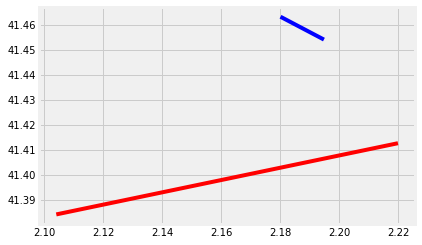

In [248]:
##Draw the 10 most dangerous streets
def acc_des_per_street_location_line(street_name, color):
    """returns a line"""
    prova = accidents[['street', 'longitude', 'latitude']]
    longitude = []
    latitude = []
    for row in prova.itertuples():
        
        if (street_name in row[1]) & (row[2] >0) &(row[3] >0):
            longitude.append(row[2])
            latitude.append(row[3])
    longitude_max = 0
    longitude_min = 100
    latitude_1 = 0
    latitude_2 = 0
    for a in zip(longitude, latitude):
        if a[0] > longitude_max:
            longitude_max = a[0]
            latitude_2 = a[1]
        if a[0] < longitude_min:
            longitude_min = a[0]
            latitude_1 = a[1]
    plt.plot([longitude_min, longitude_max], [latitude_1, latitude_2],c=color)
acc_des_per_street_location_line('meridiana', 'blue') 
acc_des_per_street_location_line('diagonal', 'red')

In [234]:
##coutnaccidents que passen a les corts catalanes
def plot_street(street_name):
    street_name = street_name.lower()
    prova = accidents[['street', 'longitude', 'latitude']]
    accid = pd.DataFrame()
    longitude = []
    latitude = []
    for row in prova.itertuples():
        
        if (street_name in row[1]) & (row[2] >0) &(row[3] >0):
            latitude.append(row[2])
            longitude.append(row[3])
    accid['longitude'] = longitude
    accid['latitude'] = latitude


def acc_des_per_street(street_name):
    corts_acc = 0
    corts_dea = 0
    for idx in street.index:
        if street_name in idx:
            corts_acc += street.at[idx, 'number_of_accidents']
            corts_dea += street.at[idx, 'number_of_deaths']
    return corts_acc, corts_dea, street.at[street_name, 'number_of_accidents'], street.at[street_name, 'number_of_deaths']
def acc_des_per_street_location(street_name):
    prova = accidents[['street', 'longitude', 'latitude']]
    accid = pd.DataFrame()
    longitude = []
    latitude = []
    for row in prova.itertuples():
        
        if (street_name in row[1]) & (row[2] >0) &(row[3] >0):
            longitude.append(row[2])
            latitude.append(row[3])
    accid['longitude'] = longitude
    accid['latitude'] = latitude
    return accid
def acc_des_per_street_location_line(street_name, color):
    """returns a line"""
    prova = accidents[['street', 'longitude', 'latitude']]
    longitude = []
    latitude = []
    for row in prova.itertuples():
        
        if (street_name in row[1]) & (row[2] >0) &(row[3] >0):
            longitude.append(row[2])
            latitude.append(row[3])
    longitude_max = 0
    longitude_min = 100
    latitude_1 = 0
    latitude_2 = 0
    for a in zip(longitude, latitude):
        if a[0] > longitude_max:
            longitude_max = a[0]
            latitude_2 = a[1]
        if a[0] < longitude_min:
            longitude_min = a[0]
            latitude_1 = a[1]
    plt.plot([longitude_min, longitude_max], [latitude_1, latitude_2],c=color)


diagonal = acc_des_per_street_location('Diagonal')
x = diagonal['longitude'].values
y = diagonal['latitude'].values
#acc_des_per_street_location_line('Diagonal', 'red')





In [179]:
y.max()

41.41282160979541

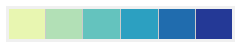

<Figure size 792x648 with 0 Axes>

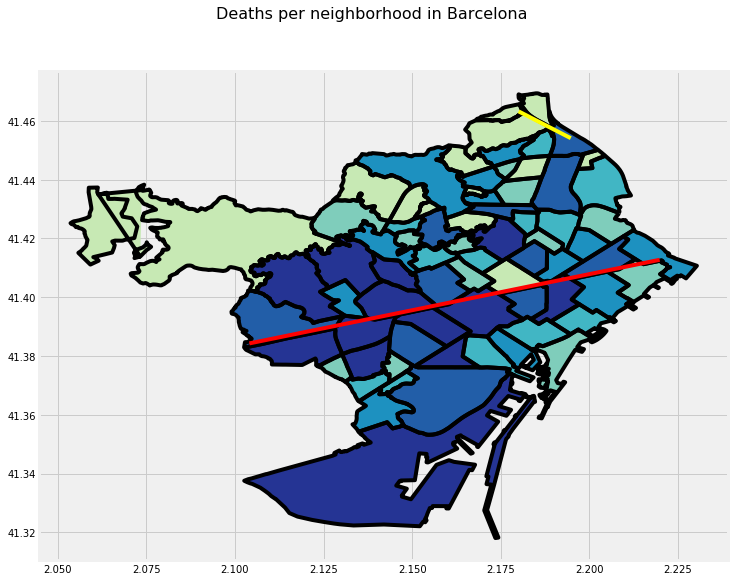

In [254]:
def plot_barris_data_bis(street_name, sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    dataframe = acc_des_per_street_location(street_name)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_distri == i].index.get_values()[0])
    subplot_map_fill_multiples_ids_tone(dataframe,sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7));
    
def subplot_map_fill_multiples_ids_tone(dataframe, sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        ax.scatter(carrer_x,carrer_y, c='r')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            name = df.at[id,'n_distri']
            plt.text(x0, y0, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    carrer_x = dataframe['longitude'].values
    carrer_y = dataframe['latitude'].values
    plt.scatter(carrer_x,carrer_y, c='r')
    
title = 'Deaths per neighborhood in Barcelona'
data = neighborhood.number_of_deaths
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 2);
# x = diagonal['longitude'].values
# y = diagonal['latitude'].values
# plt.scatter(x,y,c='r')
acc_des_per_street_location_line('diagonal','red')
acc_des_per_street_location_line('meridiana', 'yellow')
# circle_rad = 45
# point = (2.1, 41.36)
# plt.plot(point[0], point[1], 'o',
#         ms=circle_rad * 2, mec='b', mfc='none', mew=2)
#plt.plot(x,y,zorder=1)
#plt.plot(x_,y_, linewidth=10)
#plt.legend(street_name)

In [441]:
acc_des_per_street('Diagonal')

(4014, 13.0, 3288, 10.0)

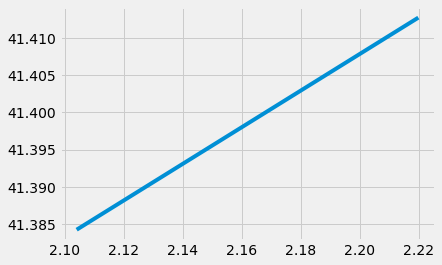

In [185]:
longitude_max = 0
longitude_min = 100
latitude_1 = 0
latitude_2 = 0
for a in zip(diagonal['longitude'], diagonal['latitude']):
    if a[0] > longitude_max:
        longitude_max = a[0]
        latitude_2 = a[1]
    if a[0] < longitude_min:
        longitude_min = a[0]
        latitude_1 = a[1]
x_ = [longitude_min, longitude_max]
y_ = [latitude_1, latitude_2]
plt.plot(x_,y_)
        

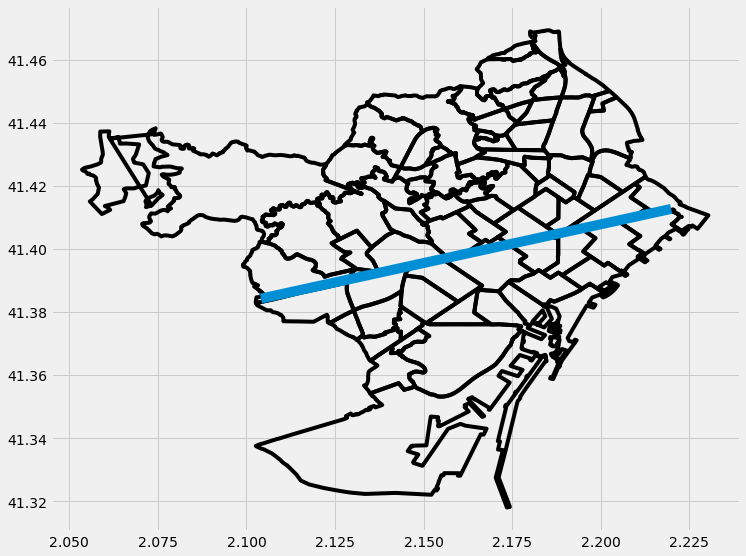

In [191]:
shp_path = "./shapefiles_barrio_barcelona/shapefiles_barrio_barcelona.shp"
barri_sf = shp.Reader(shp_path)
def plot_map_barri(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    #name = df[df['cartodb_id'] == id]['n_distri'].values[0]
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #name = df[df['cartodb_id'] == id+1]['n_distri'].values[0]
            #name = df.at[id,'n_distri']
            #plt.text(x0, y0, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#plot_barri_data(sf, title, names, data, 2, True);
plot_map_barri(sf)
#plt.scatter(x,y,c='r')
#plt.plot(x,y,zorder=2)
#plt.scatter(x,y,)
plt.plot(x_,y_, linewidth=10)

In [627]:
def calc_color_barri(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data.rank(method='first'), 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
    
def plot_cities_data_barri(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color_barri(data, color)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_barri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            #name = df.at[id,'n_distri']
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [640]:
barris = accidents.groupby('neighborhood').agg({'incident_#': 'count', '#_deaths': 'sum'})
barris.columns = ['number_of_accidents', 'number_of_deaths']
barris.drop('Desconegut', inplace=True)
barris.at['la Sagrada Familia', 'number_of_accidents'], barris.at['la Sagrada Familia', 'number_of_deaths']

(2925, 0.0)


1: 1 => 12

2: 13 => 24

3: 25 => 36

4: 37 => 48

5: 49 => 59

6: 60 => 72


   1   2   3   4   5   6


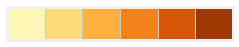

<Figure size 792x648 with 0 Axes>

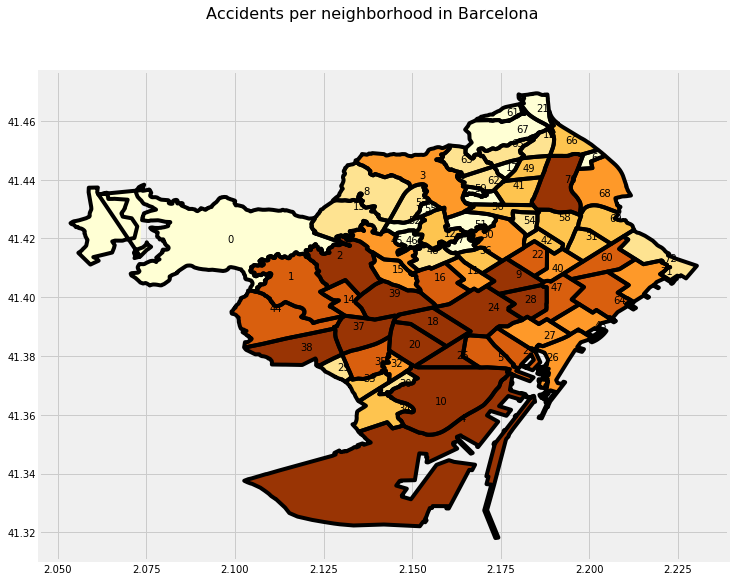

In [628]:
title = 'Accidents per neighborhood in Barcelona'
data = barris.number_of_accidents
names = barris.index
plot_cities_data_barri(barri_sf, title, names, data, 4, True)


1: 1 => 12

2: 13 => 24

3: 25 => 36

4: 37 => 48

5: 49 => 59

6: 60 => 72


   1   2   3   4   5   6


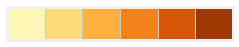

<Figure size 792x648 with 0 Axes>

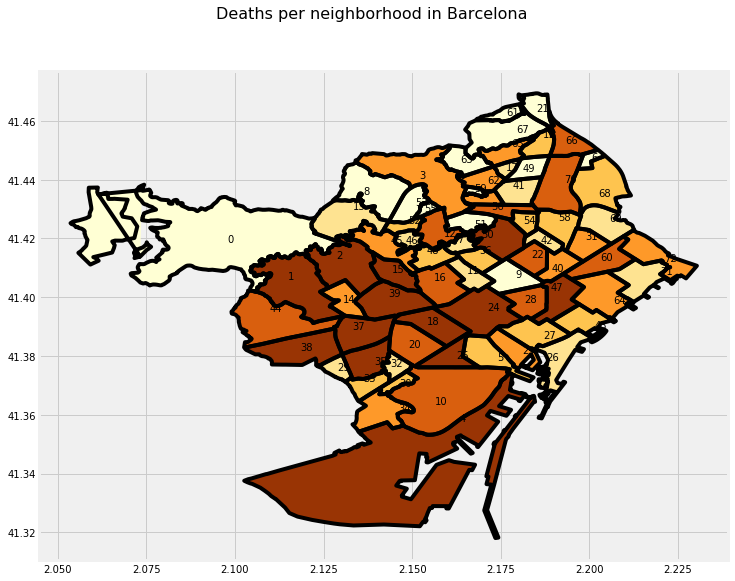

In [629]:
title = 'Deaths per neighborhood in Barcelona'
data = barris.number_of_deaths
names = barris.index
plot_cities_data_barri(barri_sf, title, names, data, 4, True)

In [7]:
shp_path = "./shapefiles_barcelona_seccion_censal/shapefiles_barcelona_seccion_censal.shp"
censal_sf = shp.Reader(shp_path)
def plot_map_censal(sf, x_lim = None, y_lim = None, figsize = (14,14)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    #name = df[df['cartodb_id'] == id]['n_distri'].values[0]
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #name = df[df['cartodb_id'] == id+1]['n_distri'].values[0]
            #name = df.at[id,'n_distri']
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#plot_map_censal(censal_sf)

In [664]:
def plot_map_censal(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

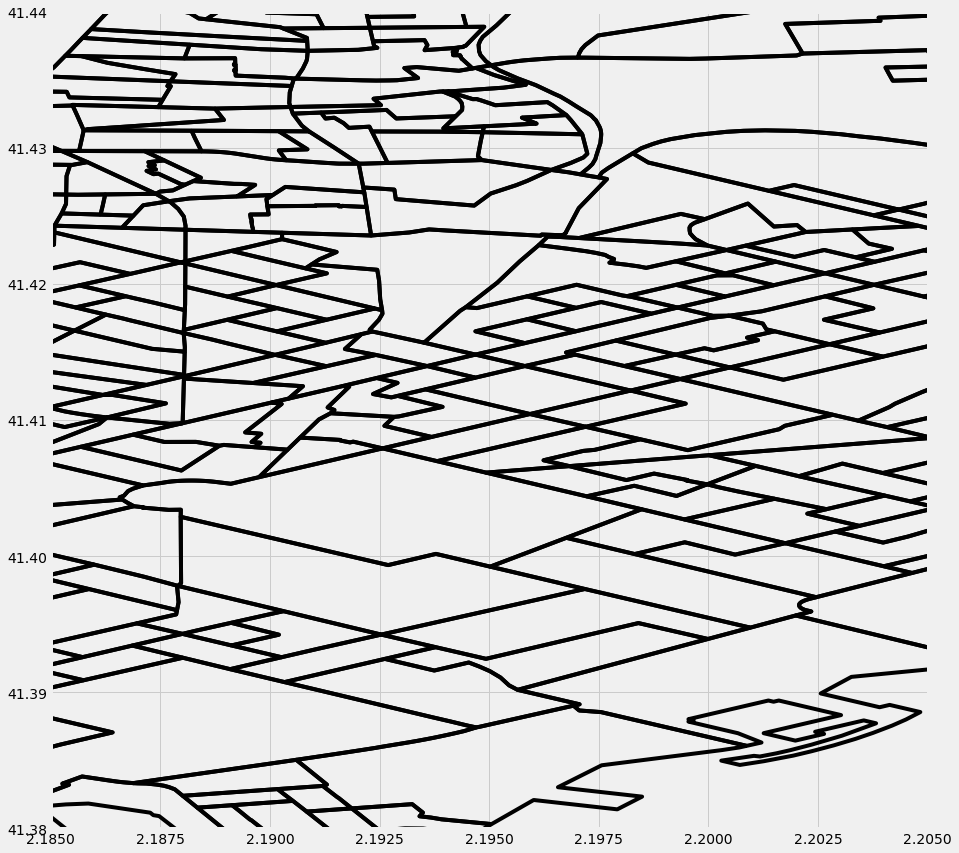

In [8]:
y_lim = (41.38,41.44) # latitude 
x_lim = (2.185, 2.205) # longitude
plot_map_censal(censal_sf, x_lim, y_lim)

In [608]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

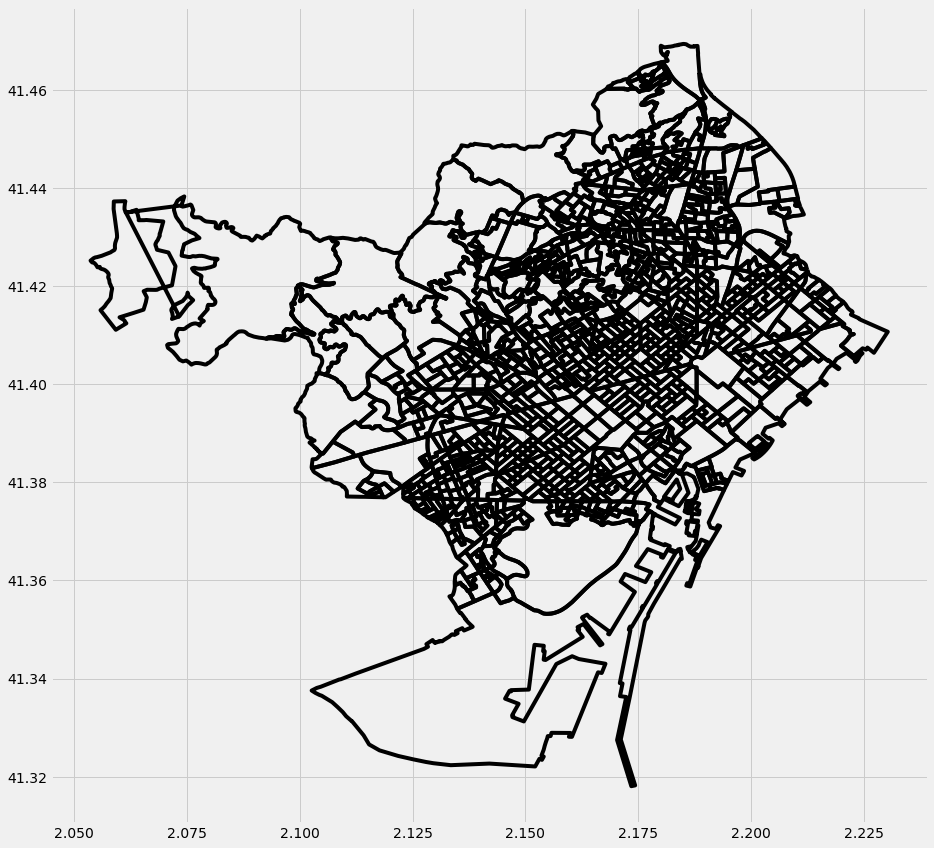

In [87]:
id=0
plt.figure(figsize=(14,14))
for shape in censal_sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,'k')
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     plt.plot(x, y, 'k')

#     if (x_lim == None) & (y_lim == None):
#         x0 = np.mean(x)
#         y0 = np.mean(y)
#         plt.text(x0, y0, id, fontsize=10)
#     id = id+1

# if (x_lim != None) & (y_lim != None):     
#     plt.xlim(x_lim)
#         plt.ylim(y_lim)

In [84]:
[x for x in nou_barris.columns if 'long' in x]
#nou_barris = accidents[accidents['district'] == 'Nou Barris']
coor = accidents.loc[(accidents['longitude'] <= 41.47) & (accidents['longitude'] >= 41.428)&\
                         (accidents['latitude'] <= 2.19) & (accidents['latitude'] >= 2.159)&\
                    (accidents['#_deaths'] >0)][['latitude','longitude']]
latitude = coor['latitude'].values
longitude =coor['longitude'].values
print('longitude: ', max(longitude), max(y), min(longitude), min(y), len(longitude))
print('latitude: ', max(latitude), max(x), min(latitude), min(x), len(latitude))





longitude:  41.452169754499934 41.46937355674509 41.428566789579314 41.456053901498336 21
latitude:  2.1896179483056493 2.189991792459914 2.16329161455341 2.1799995747703456 21


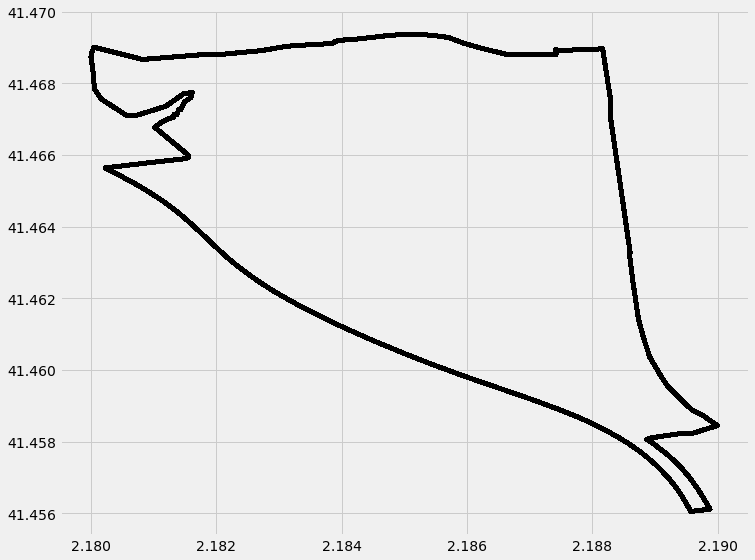

In [86]:
plt.figure(figsize=(11,9))
for a, b in zip(censal_sf.records(), censal_sf.shapeRecords()):
    if a[13] == '52':
        x = [i[0] for i in b.shape.points[:]]
        y = [i[1] for i in b.shape.points[:]]
    plt.plot(x,y,'k')
    #plt.scatter(latitude,longitude)

In [69]:
type(x)

list

In [68]:
for shape in censal_sf.shapeRecords()[0:40]:
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
x,y

([2.1388117157608844,
  2.138855102148531,
  2.1390251453300206,
  2.139846943818859,
  2.1403298447976233,
  2.1407789168799227,
  2.1408063454385564,
  2.140950074202457,
  2.1425149183014085,
  2.141149416932365,
  2.1406817158770632,
  2.1406503684961975,
  2.140475622944663,
  2.1403863118267927,
  2.140137855424649,
  2.1401599766949087,
  2.140144667344045,
  2.140088173788377,
  2.1400760688618132,
  2.1400080903096397,
  2.139890464135048,
  2.139729016159929,
  2.139652117380169,
  2.1393323369240944,
  2.1391231330224914,
  2.139032306514049,
  2.1390027657552855,
  2.1390305089466026,
  2.138980088847126,
  2.13883883661347,
  2.138489281978645,
  2.1399595353641874,
  2.1399916691846985,
  2.1392773950744073,
  2.1387772460030945,
  2.138511945392503,
  2.138532299303854,
  2.138613645276747,
  2.1386558860058824,
  2.138679195337692,
  2.138797237629075,
  2.1388087138684275,
  2.1388117157608844],
 [41.426989065331306,
  41.42688995990639,
  41.42692793687092,
  41.42688

In [21]:
new_shp = []
coor = []
y_2 = []
for record in censal_sf.records():
    if record[3] == '06':
        coor.append(record.points[:])
for el in coor:
    print(len(el))

AttributeError: points is not a field name

In [684]:
censal_sf.records()[0:10]

[Record #0: [813, '05', 'SarriÃ\xa0-Sant Gervasi', '22', 'Vallvidrera, el Tibidabo i les Planes', '091', '001', 402, 822, 8211098.02378, 27933.5950265, 423256.714765, 4586067.31741, 'http://www.bcn.cat/sarria-santgervasi', 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'http://www.bcn.cat/estadistica/catala/dades/guiadt05/index.htm', 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri22.pdf'],
 Record #1: [763, '05', 'SarriÃ\xa0-Sant Gervasi', '22', 'Vallvidrera, el Tibidabo i les Planes', '092', '002', 403, 856, 2490150.4916, 10956.5871158, 425983.430889, 4585919.81455, 'http://www.bcn.cat/sarria-santgervasi', 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'http://www.bcn.cat/estadistica/catala/dades/guiadt05/index.htm', 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri22.pdf'],
 Record #2: [1143, '03', 'Sants-MontjuÃ¯c', '13', 'la Marina de Port', '063', '036', 264, 1216, 69413.9198366, 1261.01874479, 427996.

,longitude,latitude
592,-1.488753,-0.000009
1133,-1.488753,-0.000009
1134,-1.488753,-0.000009
1690,-1.488753,-0.000009
2244,-1.488753,-0.000009
2245,-1.488753,-0.000009
2246,-1.488753,-0.000009
2804,-1.488753,-0.000009
4560,-1.488753,-0.000009
5082,-1.488753,-0.000009


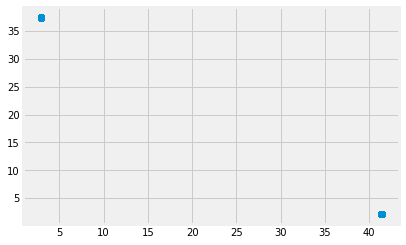

In [199]:
death_df = accidents[accidents['#_deaths'] > 0]
no_death_df = accidents[accidents['#_deaths'] == 0]
plt.scatter(prova['latitude'], prova['longitude']);
# plt.scatter(no_death_df['latitude'], no_death_df['longitude'])
# len(death_df), len(no_death_df)
accidents.loc[accidents['longitude'] < 3][['longitude', 'latitude']]

### About the deads, minor injures, severely injured and victims

In [27]:
accidents['#_deaths'] = accidents['#_deaths'].astype(int)
taula = pd.DataFrame(accidents.groupby('#_deaths').count()['incident_#'])
taula  = taula.rename(columns={"incident_#": "amount of accidents"})
taula['Percentage over total'] = (taula['amount of accidents']/len(accidents)) *100
taula['Percentage over total'] = ['{:,.4f}%'.format(x) for x in taula['Percentage over total']]
taula

,amount of accidents,Percentage over total
#_deaths,,
0,86453,99.7312%
1,227,0.2619%
2,4,0.0046%
3,2,0.0023%


In [28]:
### Let's focus only in the number of deads. It is clear to see how the few accidnets
### with a big number of deads can change everything
taula2 = pd.DataFrame((accidents[accidents['#_deaths'] > 0]).groupby(['#_deaths']).count()['incident_#'])
taula2  = taula2.rename(columns={"incident_#": "amount_of_accidents"})
taula2['percentage_over_total'] = (taula2['amount_of_accidents']/taula2['amount_of_accidents'].sum()) *100
taula2['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_total']]
taula2['total_number_deaths'] = taula2['amount_of_accidents'] * taula2.index
taula2['percentage_over_deaths'] = (taula2['total_number_deaths']/taula2['total_number_deaths'].sum()) *100
taula2['percentage_over_deaths'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_deaths']]

taula2

,amount_of_accidents,percentage_over_total,total_number_deaths,percentage_over_deaths
#_deaths,,,,
1,227,97.4249%,227,94.1909%
2,4,1.7167%,8,3.3195%
3,2,0.8584%,6,2.4896%


In [29]:
accidents['minor_injuries'] = accidents['minor_injuries'].astype(int)
minor = pd.DataFrame(accidents.groupby('minor_injuries').count()['incident_#'])
minor = minor.rename(columns={'incident_#': "number_of_accidents"})
minor['percentage_over_total'] = (minor['number_of_accidents']/len(accidents))*100
minor['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in minor['percentage_over_total']]
minor['accumulative'] = (minor['number_of_accidents'].cumsum()/len(accidents))*100
minor['accumulative'] = ['{:,.2f}%'.format(x) for x in minor['accumulative']]
minor[0:10]

,number_of_accidents,percentage_over_total,accumulative
minor_injuries,,,
0,9216,10.6315%,10.63%
1,60440,69.7229%,80.35%
2,13226,15.2574%,95.61%
3,2380,2.7455%,98.36%
4,852,0.9829%,99.34%
5,323,0.3726%,99.71%
6,133,0.1534%,99.87%
7,51,0.0588%,99.93%
8,28,0.0323%,99.96%


In [30]:
accidents['severe_injuries'] = accidents['severe_injuries'].astype(int)
greu = pd.DataFrame(accidents.groupby('severe_injuries').count()['incident_#'])
greu = greu.rename(columns={'incident_#': "number_of_accidents"})
greu['percentage_over_total'] = (greu['number_of_accidents']/len(accidents))*100
greu['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in greu['percentage_over_total']]
greu

,number_of_accidents,percentage_over_total
severe_injuries,,
0,84696,97.7044%
1,1885,2.1745%
2,91,0.1050%
3,12,0.0138%
4,2,0.0023%


In [31]:
accidents['amount_victims'] = accidents['amount_victims'].astype(int)
total_amount = pd.DataFrame(accidents.groupby('amount_victims').count()['incident_#'])
total_amount = total_amount.rename(columns={'incident_#': "number_of_accidents"})
total_amount['percentage_over_total'] = (total_amount['number_of_accidents']/len(accidents))*100
total_amount['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in total_amount['percentage_over_total']]
total_amount['accrued'] = total_amount['number_of_accidents'].cumsum()/len(accidents) * 100
total_amount['accrued'] = ['{:,.4f}%'.format(x) for x in total_amount['accrued']]
total_amount[0:10]

,number_of_accidents,percentage_over_total,accrued
amount_victims,,,
0,7586,8.7511%,8.7511%
1,61557,71.0115%,79.7626%
2,13619,15.7107%,95.4733%
3,2454,2.8309%,98.3042%
4,885,1.0209%,99.3252%
5,323,0.3726%,99.6978%
6,138,0.1592%,99.8570%
7,55,0.0634%,99.9204%
8,31,0.0358%,99.9562%


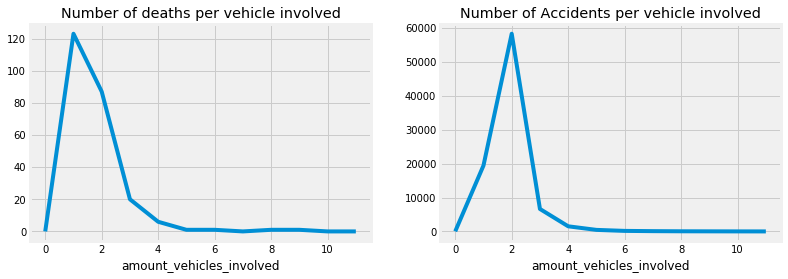

In [32]:
accidents['amount_vehicles_involved'] = accidents['amount_vehicles_involved'].astype(int)
deads_number_vehicles = accidents.groupby('amount_vehicles_involved').sum()['#_deaths']
accidents_number_vehicles = accidents.groupby('amount_vehicles_involved').count()['#_deaths']
fig, axes = plt.subplots(1,2, figsize=(12,4))

deads_number_vehicles[0:12].plot(kind='line', ax=axes[0],\
                                 title="Number of deaths per vehicle involved")
accidents_number_vehicles[0:12].plot(kind='line', ax=axes[1],\
                                 title="Number of Accidents per vehicle involved")

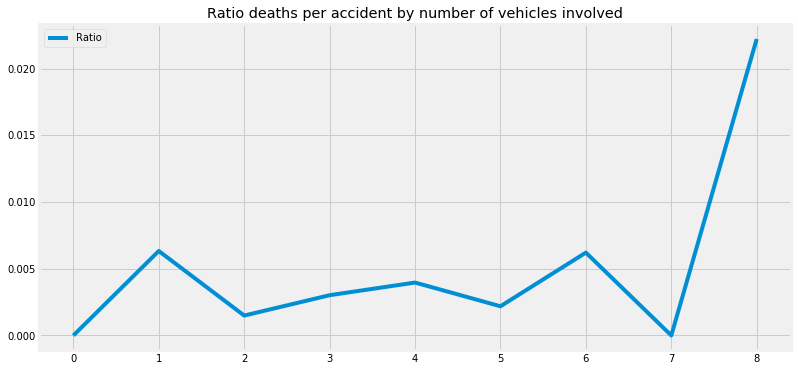

In [33]:
ratio = []
for x, y in zip(deads_number_vehicles, accidents_number_vehicles):
    ratio.append(x/y)
ratio
max_ratio = 0
number_vehicles =  0
for x, y in zip(ratio, deads_number_vehicles.index):
    if x > max_ratio:
        max_ratio = x
        number_vehicles = y
max_ratio, number_vehicles

plt.figure(figsize=(12, 6))
plt.xticks(range(0,17))
plt.title('Ratio deaths per accident by number of vehicles involved')
plt.plot(accidents_number_vehicles.index[0:9], ratio[0:9], label= 'Ratio')
plt.legend()
plt.savefig('./charts/ratio_deaths_accidents_vehicles_2018.png');

In [34]:
vehicles = pd.DataFrame(accidents.groupby('amount_vehicles_involved').count()['incident_#'])
columns = ['number_of_accidents']
vehicles.columns = columns
vehicles['average_accidents'] = vehicles['number_of_accidents']/len(accidents)
vehicles['average_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_accidents']]
vehicles['accrued_accidents'] = vehicles['number_of_accidents'].cumsum()/len(accidents)
vehicles['accrued_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_accidents']]
vehicles['number_of_deaths'] = (accidents.groupby('amount_vehicles_involved').sum()['#_deaths']).values
vehicles['average_deaths'] = vehicles['number_of_deaths']/accidents['#_deaths'].sum()
vehicles['average_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_deaths']]
vehicles['accrued_deaths'] = vehicles['number_of_deaths'].cumsum()/accidents['#_deaths'].sum()
vehicles['accrued_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_deaths']]

In [35]:
vehicles.drop(['average_accidents', 'average_deaths', 'accrued_accidents', 'accrued_deaths'], axis=1)[0:10]

,number_of_accidents,average_accidents_%,accrued_accidents_%,number_of_deaths,average_deaths_%,accrued_deaths_%
amount_vehicles_involved,,,,,,
0,26,0.0300%,0.0300%,0,0.0000%,0.0000%
1,19425,22.4085%,22.4385%,123,51.0373%,51.0373%
2,58287,67.2392%,89.6777%,87,36.0996%,87.1369%
3,6626,7.6437%,97.3214%,20,8.2988%,95.4357%
4,1513,1.7454%,99.0667%,6,2.4896%,97.9253%
5,457,0.5272%,99.5939%,1,0.4149%,98.3402%
6,161,0.1857%,99.7797%,1,0.4149%,98.7552%
7,86,0.0992%,99.8789%,0,0.0000%,98.7552%
8,45,0.0519%,99.9308%,1,0.4149%,99.1701%


In [36]:
number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_accidents, number_total_deaths

(86686, 241)

## Pedestrian Analysis

In [37]:
##Double checking the columns
is_role = [ x for x in accidents.columns if x.startswith('is_role')]
for col in is_role:
    print(col, accidents[col].unique())

is_role_non_existing [1 0]
is_role_driver [0 1]
is_role_pedestrian [0 1]
is_role_passenger [0 1]


In [135]:
print("Number of Accidents with pedestrian involvemet and its percentage: ",\
      len(accidents[accidents['is_role_pedestrian'] == 1]),\
      round((len(accidents[accidents['is_role_pedestrian'] == 1])/number_total_accidents)*100,2),'%','\n')
print("Number of Deaths with pedestrian involvemet and its percentage over the total: ",\
      len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)]),\
      round((len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])/number_total_deaths)*100,2),'%','\n')

Number of Accidents with pedestrian involvemet and its percentage:  10267 11.84 % 

Number of Deaths with pedestrian involvemet and its percentage over the total:  97 40.25 % 



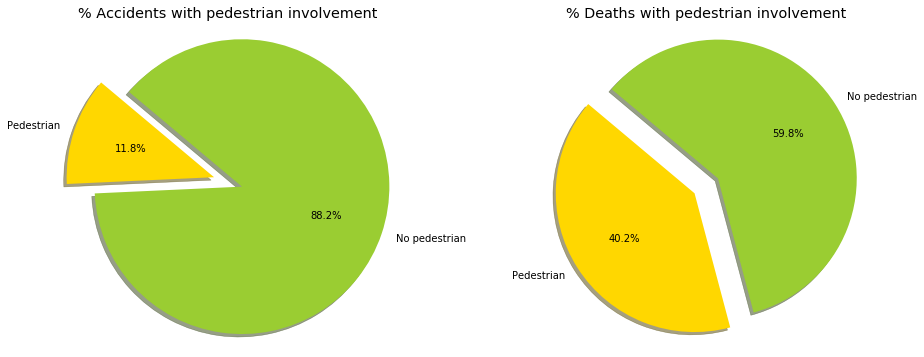

In [141]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Pedestrian', 'No pedestrian']
ped_acc = len(accidents[accidents['is_role_pedestrian'] == 1])
no_ped_acc = number_total_accidents - len(accidents[accidents['is_role_pedestrian'] == 1])
sizes_acc = [ped_acc, no_ped_acc]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents with pedestrian involvement")
#labels = list(mediate_cause_df.index)
ped_dea = len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])
no_ped_dea = number_total_deaths - len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])
sizes = [ped_dea, no_ped_dea]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths with pedestrian involvement")
plt.show()

### The field 'pedestrian_cause' explains how th pedestrian is involved in the accident. 
#### First, in how many accidents there was a pedestrian involved?

Number of accidents with pedestrain:  10267
Percentage over total:  11.84 %
Number of deaths in accidents with pedestrain:  100
Percentage over total:  41.49 %
Percentage of accidents with pedestrian of unknown cause:  31.89 %
Percentage of accidents with pedestrains where the pedestrian is not reponsible:  25.91 %
Rest of causes and its average: 


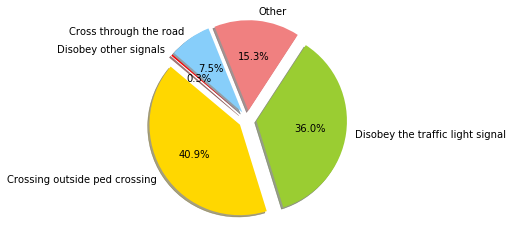

In [38]:
# pedestrian = pd.DataFrame(accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['incident_#'].count())
# pedestrian.columns = ['number_accidents']
# pedestrian['number_deaths'] = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['#_deaths'].sum().values
pedestrian = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause').agg({'incident_#': 'count', '#_deaths': 'sum'})
pedestrian.columns = ['number_accidents', 'number_deaths']
print("Number of accidents with pedestrain: ", pedestrian['number_accidents'].sum())
print("Percentage over total: ", round((pedestrian['number_accidents'].sum()/number_total_accidents)*100,2),'%')
print("Number of deaths in accidents with pedestrain: ", pedestrian['number_deaths'].sum())
print("Percentage over total: ", round((pedestrian['number_deaths'].sum()/number_total_deaths)*100,2),'%')


print('Percentage of accidents with pedestrian of unknown cause: ',\
      round((pedestrian.at['unknown', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')
print('Percentage of accidents with pedestrains where the pedestrian is not reponsible: ',\
      round((pedestrian.at['No peds fault', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')

clean_pedestrian= pedestrian.drop(['unknown', 'No peds fault'])
clean_pedestrian['average_accidents'] = round(clean_pedestrian['number_accidents']/clean_pedestrian['number_accidents'].sum(), 2)*100
clean_pedestrian.sort_values(by='average_accidents', ascending=False, inplace=True)
clean_pedestrian['average_accidents'] = [str(round(x,2)) + '%' for x in clean_pedestrian['average_accidents']]
# print('Out of the ones of known causes where the pedestrian is responsible; What are the causes?',round((pedestrian.drop('unknown').at['No peds fault','incident_#']\
#        /pedestrian.drop('No peds fault')['number_accidents'].sum())*100,2), '%')
#clean_pedestrian.drop('Other')
print("Rest of causes and its average: ")
#clean_pedestrian
labels = list(clean_pedestrian.index)
sizes = list(clean_pedestrian['number_accidents'])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
#plt.show()
plt.savefig('./charts/pedestrian_cause_accidents_2018.png');

## One Final Note

In [39]:
### Despite "Crossing
print("Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round(((1772+1561)/pedestrian['number_accidents'].sum())*100, 2),'%')
print("Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round((52/pedestrian['number_deaths'].sum())*100, 2),'%')

Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 32.46 %
Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 52.0 %


# Causes

In [40]:
##Aboutcauses

is_cause_list = [x for x in accidents.columns if 'is_cause' in x]
cause_df = pd.DataFrame(index=is_cause_list)
for ix in is_cause_list:
    cause_df.at[ix, 'number_accidents'] = accidents.loc[accidents[ix] == 1]['incident_#'].count()
    cause_df.at[ix, 'number_deaths'] = accidents.loc[accidents[ix] == 1]['#_deaths'].sum()
cause_df.index = [x[9:].lower() for x in cause_df.index]
cause_df.drop('non_existing',inplace=True)
#mediate_cause_df = cause_df.drop('no mediate cause')
cause_df

,number_accidents,number_deaths
signals_damaged,41.0,0.0
unknown,21.0,0.0
objects or animals on the road,15.0,0.0
no mediate cause,81712.0,198.0
weather,14.0,0.0
speeding,871.0,37.0
drunkdriving,3279.0,6.0
road_damaged,762.0,1.0
dui,138.0,4.0


In [41]:
the_rest = 0
for idx in cause_df.index:
    if cause_df.at[idx,'number_accidents'] <100:
        the_rest += cause_df.at[idx,'number_accidents']
cause_df.at['the_rest', 'number_accidents'] = the_rest
mediate_cause_df = cause_df.loc[['speeding', 'drunkdriving', 'dui', 'the_rest']]

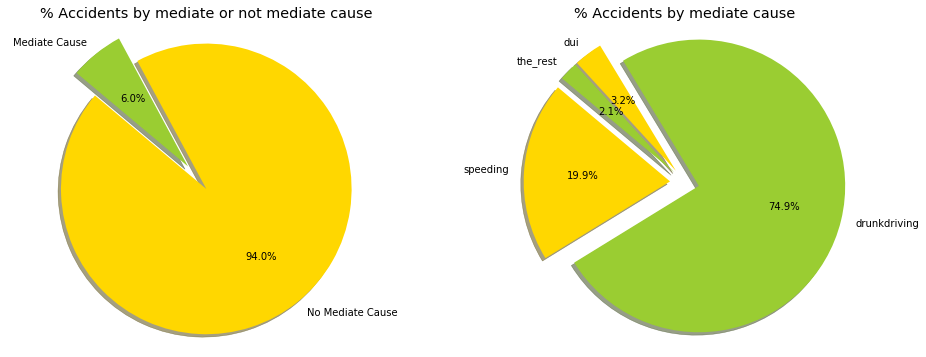

In [42]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['No Mediate Cause', 'Mediate Cause']
no_med_cause_acc = cause_df.at['no mediate cause', 'number_accidents']
no_med_cause_dea = cause_df.at['no mediate cause', 'number_deaths']
sizes_acc = [no_med_cause_acc/number_total_accidents, (cause_df['number_accidents'].sum() - no_med_cause_acc)/number_total_accidents]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by mediate or not mediate cause")
labels = list(mediate_cause_df.index)
sizes = list(mediate_cause_df['number_accidents'])
explode = tuple([0.1] * len(mediate_cause_df))
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Accidents by mediate cause")
plt.show()

# Vehicles

In [43]:
is_vehicle_list = [x for x in accidents.columns if 'is_vehicle' in x][0:9]
#is_vehicle_list = [x.strip('_')[-1] for x in is_vehicle_list]
#motorbike
print("Number of accidents with motorbikes: ", len(accidents[accidents['is_vehicle_Motorbike'] == 1]))
print("Percentage of accidents with motorbikes: ",
      round((len(accidents[accidents['is_vehicle_Motorbike'] == 1])/number_total_accidents)*100, 2), '%')

Number of accidents with motorbikes:  42140
Percentage of accidents with motorbikes:  48.61 %


In [44]:
df_vehicle = pd.DataFrame(index=is_vehicle_list)
for item in is_vehicle_list:
    df_vehicle.at[item,'number_deceased'] = accidents[accidents[item] == 1]['#_deaths'].sum()
    df_vehicle.at[item,'number_accidents'] = accidents[accidents[item] == 1]['incident_#'].count()
    df_vehicle.at[item,'avg_accidents_per_vehicle'] = (accidents[accidents[item] == 1]['incident_#'].count()/number_total_accidents )*100
    df_vehicle.at[item, 'avg_deaths_per_vehicle'] = (accidents[accidents[item] == 1]['#_deaths'].sum()/number_total_deaths)*100
df_vehicle.index = [x.split('_')[-1] for x in df_vehicle.index]
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
unknown,0.0,7590.0,8.755739,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Van,5.0,2267.0,2.615186,2.074689
Other vehicles,16.0,3306.0,3.813765,6.639004
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


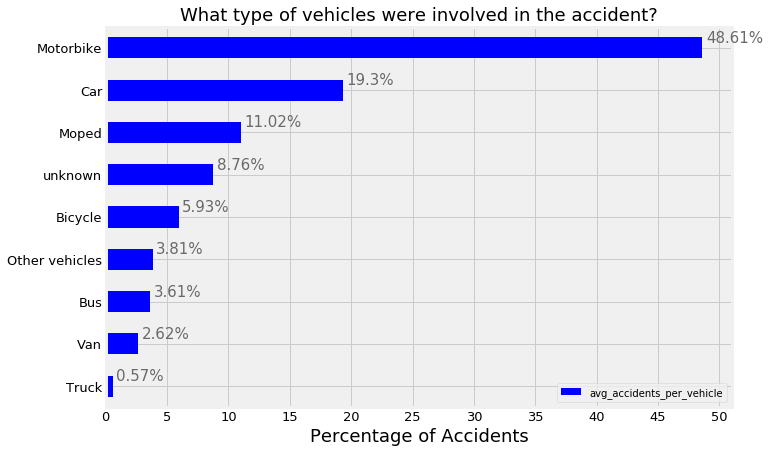

In [45]:
ax = df_vehicle.sort_values('avg_accidents_per_vehicle').plot(kind='barh', y = 'avg_accidents_per_vehicle',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved in the accident?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


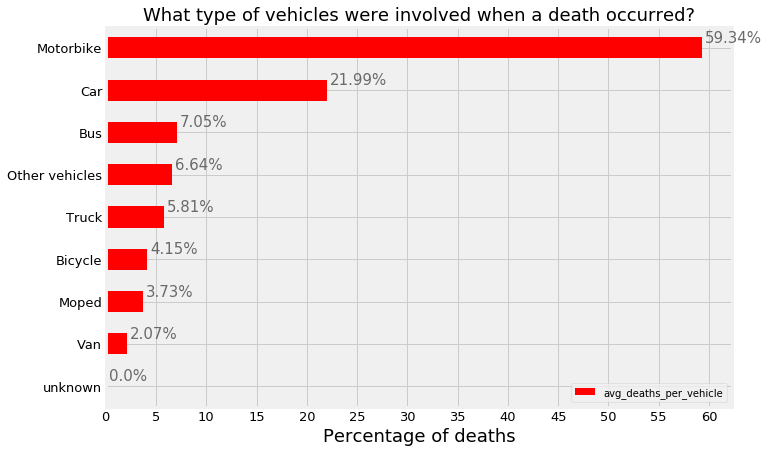

In [46]:

ax = df_vehicle.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = 'avg_deaths_per_vehicle', figsize=(10,7),
                                        color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a death occurred?", fontsize=18)
ax.set_xlabel("Percentage of deaths", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

In [47]:
# I will compared the values for the most interested vehicles:
#     Motorbikes, Cars, Moped,Bus and Truck
interesting =['Motorbike', 'Car', 'Bus', 'Truck', 'Moped', 'Bicycle']
not_interesting = [x for x in df_vehicle.index if x not in interesting]
df_vehicle_short = df_vehicle.drop(not_interesting)
df_vehicle_short

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


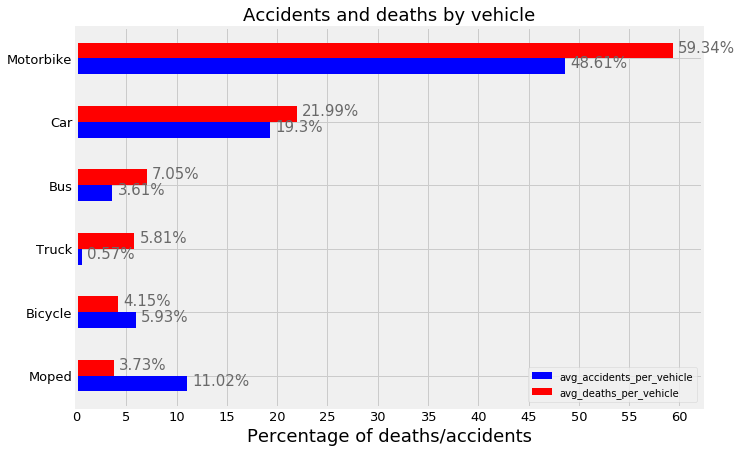

In [48]:
ax = df_vehicle_short.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = ['avg_accidents_per_vehicle','avg_deaths_per_vehicle'], figsize=(10,7),
                                        color=["blue","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Accidents and deaths by vehicle", fontsize=18)
ax.set_xlabel("Percentage of deaths/accidents", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.1, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

# Finally, what is the deadliest vehicle?
## Let's divide de amount of deaths in accidents where such a vehicle took part by the number of accidents in which the vehicle was involved

In [49]:
df_vehicle['deadly_ratio'] =(df_vehicle['number_deceased']/df_vehicle['number_accidents'])*100
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle,deadly_ratio
unknown,0.0,7590.0,8.755739,0.000000,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100,0.339345
Car,53.0,16732.0,19.301848,21.991701,0.316758
Moped,9.0,9557.0,11.024848,3.734440,0.094172
Van,5.0,2267.0,2.615186,2.074689,0.220556
Other vehicles,16.0,3306.0,3.813765,6.639004,0.483969
Bicycle,10.0,5144.0,5.934061,4.149378,0.194401
Bus,17.0,3128.0,3.608426,7.053942,0.543478
Truck,14.0,492.0,0.567566,5.809129,2.845528


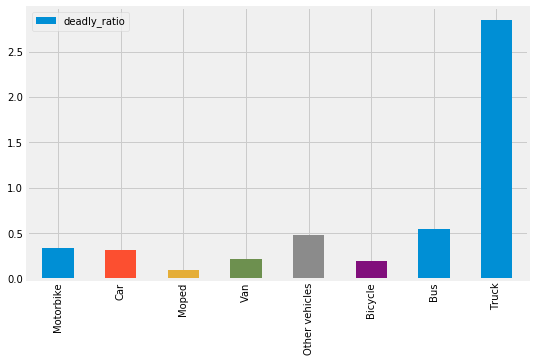

In [50]:
df_vehicle.drop('unknown').plot(kind='bar', y='deadly_ratio', figsize=(8,5));

# Analyzing Driver's Age

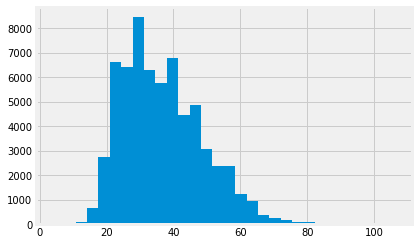

In [51]:
age_driver_known =accidents[accidents['age_driver'] !=0]
plt.hist(age_driver_known['age_driver'], bins=30);

25 Rectangle(xy=(25, 0), width=5, height=10614, angle=0)


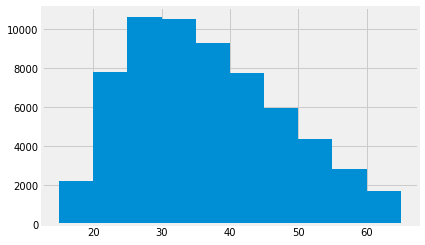

In [52]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_known['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# Driver's gender

In [53]:
# What about the gender of the driver?

print("Men driving some vehicle in the accident: ",len(accidents[accidents['is_male_driver'] >0]),"\n")
print("Women driving any vehicle in the accident: ",len(accidents[accidents['is_female_driver'] > 0]), '\n')
print("Only men driving in the accident: ",len(accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]), "\n")
print("Only women driving in the accident: ", len(accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]))

Men driving some vehicle in the accident:  47888 

Women driving any vehicle in the accident:  18747 

Only men driving in the accident:  45549 

Only women driving in the accident:  16408


In [54]:
only_man = accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]
only_woman = accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]
only_man.sample()

,index,#_deaths,amount_vehicles_involved,amount_victims,day_month,district,hour_day,incident_#,latitude,longitude,...,is_license_class_regular_license,is_license_class_unknown,is_license_class_motorbike_license,is_license_class_van_license,is_license_class_bus_license,is_license_class_taxis_ambulances_license,is_license_class_moped_permit,is_license_class_non-existing,is_license_class_no_license,senority_avg
77382,624,0,2,1,16.0,Sants-Montjuïc,20.0,2018S002910,41.374427,2.13221,...,1,1,0,0,0,0,0,1,0,5.0


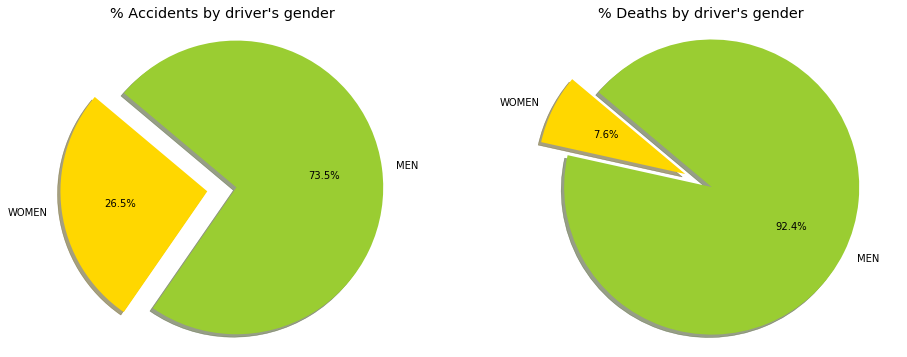

In [55]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['WOMEN', 'MEN']
sizes_acc = [(only_woman['incident_#'].count()/number_total_accidents)*100, (only_man['incident_#'].count()/number_total_accidents)*100]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by driver's gender")
sizes_de = [(only_woman['#_deaths'].sum()/number_total_deaths)*100, (only_man['#_deaths'].sum()/number_total_deaths)*100]
ax2.pie(sizes_de, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by driver's gender")
plt.show()

## DRIVERS AGE BY GENDER

In [56]:
age_driver_woman = age_driver_known[age_driver_known['is_male_driver'] == 0]
age_driver_man = age_driver_known[age_driver_known['is_female_driver'] == 0]

25 Rectangle(xy=(25, 0), width=5, height=3312, angle=0)


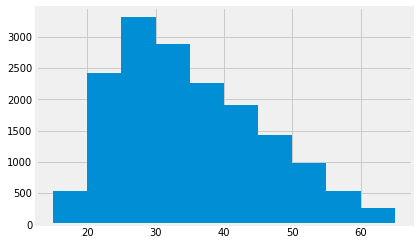

In [57]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_woman['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

30 Rectangle(xy=(30, 0), width=5, height=7203, angle=0)


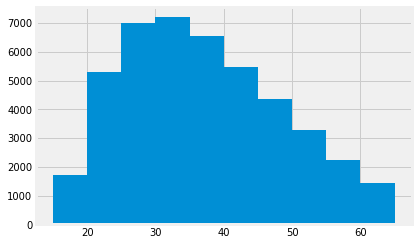

In [58]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_man['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# TYPE ACCIDENT

In [59]:
type_columns = [x for x in accidents.columns if 'type' in x][-11::]
type_df = pd.DataFrame(index=type_columns)
for col in type_columns:
    type_df.at[col,'number_deaths'] = accidents[accidents[col] == 1]['#_deaths'].sum()
    type_df.at[col,'number_accidents'] = accidents[accidents[col] == 1]['incident_#'].count()
type_df.index = [x[8::] for x in type_df.index]
type_df

,number_deaths,number_accidents
lateral_collision,77.0,37113.0
rear-end_collision,12.0,21299.0
frontal-lateral_collision,56.0,16915.0
run_over,103.0,10605.0
fall--motorcycle,29.0,8786.0
crash_into_stationary,47.0,7109.0
multiple_rear-end_collision,0.0,3054.0
Other_types,10.0,2608.0
fall_inside_vehicle,1.0,2318.0
frontal_collision,7.0,1154.0


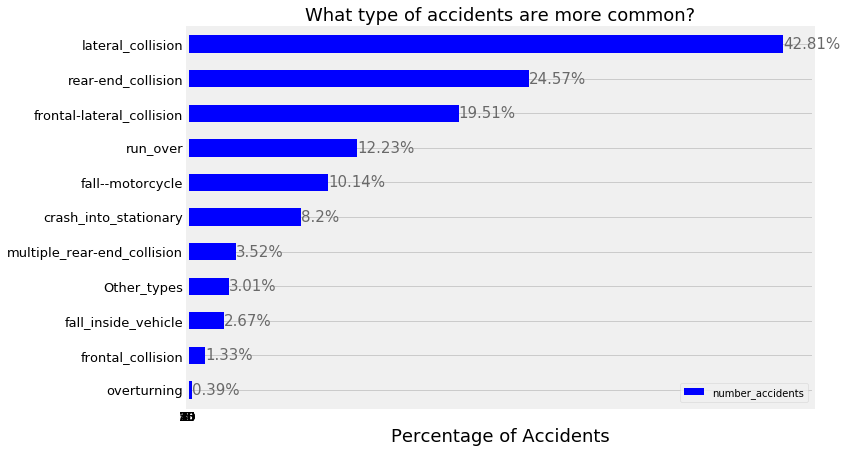

In [60]:
ax = type_df.plot(kind='barh', y = 'number_accidents',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_accidents)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
ax.invert_yaxis()


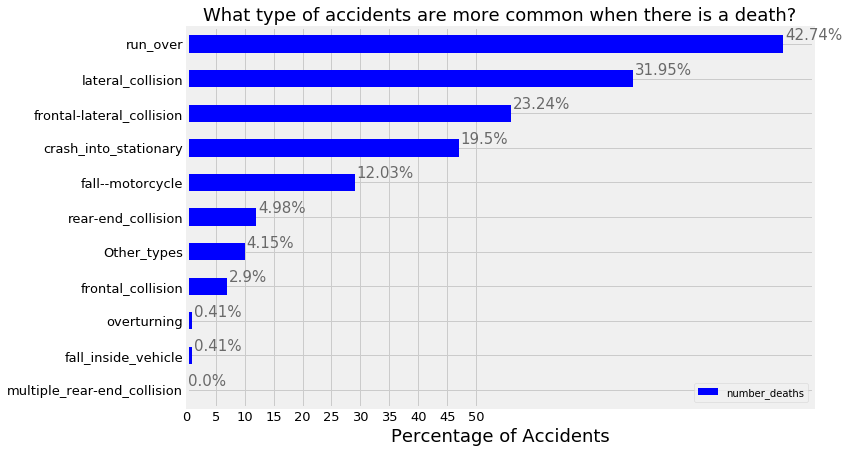

In [61]:
ax = type_df.sort_values('number_deaths').plot(kind='barh', y = 'number_deaths',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common when there is a death?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_deaths)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


# Vehicles: model, brand, color, license_class and snority

In [62]:
list_vehicles = ['vehicle_model', 'vehicle_brand', "vehicle_color", 'license_class', 'senority_license']
##model does not offer information: there are over 40000 models


## Brand

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


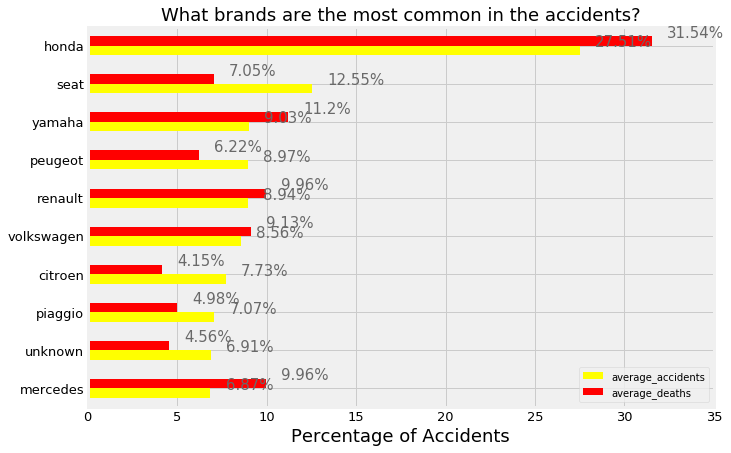

In [63]:
brand_list = [x for x in accidents.columns if 'is_vehicle_brand' in x]
brand_df = pd.DataFrame(index=brand_list)


for brand in brand_list:
    brand_df.at[brand,'number_accidents'] = accidents[accidents[brand] ==1]['incident_#'].count()
    brand_df.at[brand,'number_deaths'] = accidents[accidents[brand] ==1]['#_deaths'].sum()
brand_df
brand_df.index=[x[17::] for x in brand_list]
brand_df['average_accidents'] = (brand_df['number_accidents']/number_total_accidents)*100
brand_df['average_deaths'] = (brand_df['number_deaths']/number_total_deaths)*100
ax = brand_df.sort_values('number_accidents')[-10:].plot(kind='barh', y = ['average_accidents','average_deaths'],figsize=(10,7),
                                        color=["yellow","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What brands are the most common in the accidents?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.85, i.get_y()+.22, \
            str(round(i.get_width(),2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()

In [64]:
#let's see if the fact that honda and yamaha arae up there is because they are the most common brand for mtorcycles
print('Accidents with Motorbikes: ', len(accidents[(accidents['is_vehicle_Motorbike'] ==1)]))
print("How many Hondas? ", brand_df.at['honda', 'number_accidents'])
print("How many Yamahas? ", brand_df.at['yamaha', 'number_accidents'])
print("Accidents with Honda Motorbikes: ", accidents[(accidents['is_vehicle_Motorbike'] ==1) & (accidents['is_vehicle_brand_honda'] ==1)]['incident_#'].count(),)
print("Accidents with Yamaha Motorbike: ", accidents[(accidents['is_vehicle_Motorbike'] ==1) & (accidents['is_vehicle_brand_yamaha'] == 1)]['incident_#'].count())

Accidents with Motorbikes:  42140
How many Hondas?  23850.0
How many Yamahas?  7827.0
Accidents with Honda Motorbikes:  19692
Accidents with Yamaha Motorbike:  5974


## Color

In [65]:
accidents['amount_vehicles_involved'].sum()

166757

In [71]:
color_list = [x for x in accidents.columns if 'is_vehicle_color' in x]
summa = 0
for color in color_list:
    summa = summa + accidents[accidents[color]==1]['incident_#'].count()
summa

232737

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


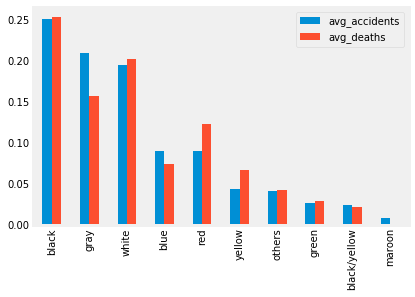

In [77]:
color_list = [x for x in accidents.columns if 'is_vehicle_color' in x]
color_df = pd.DataFrame(index=color_list)
for color in color_list:
    color_df.at[color,'number_accidents'] = accidents[accidents[color] ==1]['incident_#'].count()
    color_df.at[color,'number_deaths'] = accidents[accidents[color] ==1]['#_deaths'].sum()
color_df.index = [x[17:] for x in color_df.index]
color_df.drop('unknown', inplace=True)
color_df['avg_accidents'] = color_df['number_accidents']/color_df['number_accidents'].sum()
color_df['avg_deaths'] = color_df['number_deaths']/color_df['number_deaths'].sum()


color_df.sort_values('number_accidents',ascending=False).head(10).plot(kind='bar', y=['avg_accidents', 'avg_deaths'], secondary_y='number_deaths');

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


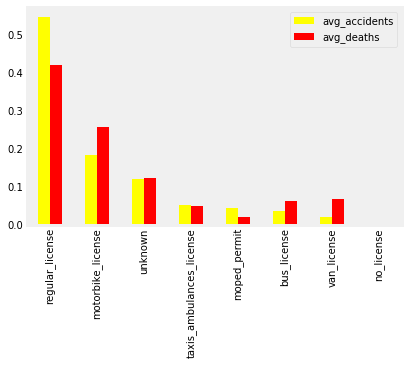

In [84]:
license_list = [x for x in accidents.columns if 'is_license_class' in x]
license_df = pd.DataFrame(index=license_list)
for col in license_list:
    license_df.at[col, 'number_accidents'] = accidents[accidents[col] ==1]['incident_#'].count()
    license_df.at[col,'number_deaths'] = accidents[accidents[col] ==1]['#_deaths'].sum()
license_df.index = [x[17:] for x in license_df.index]
license_df.drop('non-existing',inplace=True)
license_df['avg_accidents'] = license_df['number_accidents']/license_df['number_accidents'].sum()
license_df['avg_deaths'] = license_df['number_deaths']/license_df['number_deaths'].sum()
license_df.sort_values('number_accidents', ascending=False).plot(kind ='bar',y =['avg_accidents', 'avg_deaths'],\
                                                                 secondary_y='number_deaths',\
                                                                 color=['yellow', 'red'])

In [89]:
###seniority: final straw----assuming they are in years

accidents['senority_avg'].describe()

count    86686.000000
mean        15.321652
std         18.146785
min      -2921.000000
25%          7.000000
50%         14.000000
75%         22.000000
max        624.333333
Name: senority_avg, dtype: float64

86686


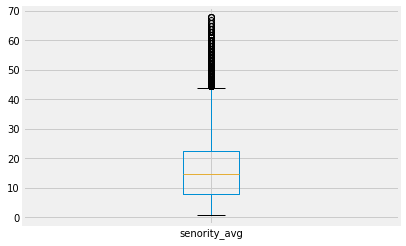

In [114]:
print(len(accidents))
license_df= accidents[(accidents['senority_avg'] >0) & (accidents['senority_avg'] <70)]\
[['senority_avg', 'incident_#', '#_deaths']]
license_death_df = license_df[license_df['#_deaths'] > 0]
license_df.boxplot('senority_avg');

(array([19399., 20801., 19287., 12155.,  6474.,  2914.,  1023.,   479.,
          154.,    36.]),
 array([ 1. ,  7.7, 14.4, 21.1, 27.8, 34.5, 41.2, 47.9, 54.6, 61.3, 68. ]),
 <a list of 10 Patch objects>)

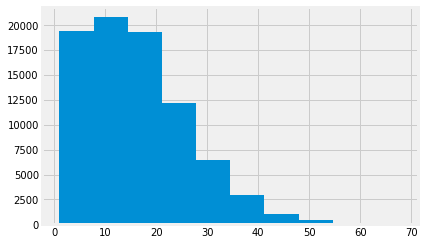

In [113]:
plt.hist(license_df['senority_avg'])

(array([64., 61., 30., 26., 21., 12.,  6.,  4.,  1.,  3.]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <a list of 10 Patch objects>)

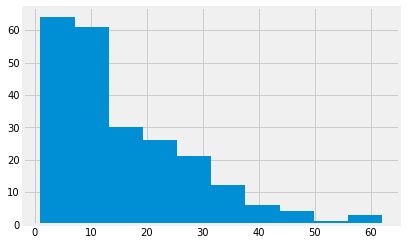

In [116]:
plt.hist(license_death_df['senority_avg'])

In [ ]:
import matplotlib.pyplot as plt
 
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Alone')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='With Himself')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='With other genotype')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()


In [ ]:
from bokeh.io import output_notebook, show
output_notebook()

In [ ]:
#from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

#output_file("bar_nested_vehicles.html")

#vehicle_list_ =[x.split('_')[-1] for x in is_vehicle_list]
caracs = ['number_accidents', 'number_deaths']

data = {'vehicles' : vehicle_list_,
        'number_accidents'   : df_vehicle['avg_accidents_per_vehicle'],
        'number_deaths'   : df_vehicle['avg_deaths_per_vehicle']}

palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (is_vehicle, carac) for is_vehicle in vehicle_list_ for carac in caracs ]
counts = sum(zip(data['number_accidents'], data['number_deaths']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Accidents/Deaths by vehicle",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=caracs, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
df_vehicles['accidents_vehicle'] = [x[0] for x in deaths_and_vehicles]
deaths_ = [x[1] for x in deaths_and_vehicles]

In [ ]:
ax.set_ylabel("#")
ax.set_xlabel("time")
ax.grid()
# Now we assume that there is data for every hour and day present
assert len(counts) == 7*24
# Hence we can tick the axis with multiples of 24h
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(1))

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def tick(x,pos):
    if x % 24 == 12:
        return days[int(x)//24]
    else:
        return ""
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(FuncFormatter(tick))
ax.tick_params(which="major", axis="x", length=10, width=1.5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

plt.plot(x[1:], y[1:], 'ro')
plt.plot(x[0], y[0], 'g*')

plt.show()